# Introduction 🚀

This Jupyter notebook offers a detailed **exploration** of a taxi dataset. The analysis is structured with **two** distinct versions:

- **taxi_df_original**: The unaltered dataset, utilized to showcase initial anomalies and outliers.
- **taxi_df_cleaned**: The refined dataset, used for the main stages of the analysis post-cleaning.

The process initiates with foundational setup activities, then moves to data cleaning, preprocessing, and critical outlier identification. Post this, the notebook delves into Exploratory Data Analysis (EDA) to uncover underlying patterns. Feature Engineering follows, enhancing the dataset for potential modeling. Data Visualization is employed to offer a graphical representation of findings, and the notebook culminates with a **Management Summary**, encapsulating **key insights and takeaways**. The structured approach ensures a cohesive and comprehensive understanding for readers.

Let's begin with step 1...

# Step 1: Initial Setup ⚙️

1. **Import Necessary Libraries**
2. **Brief Outline of the Dataset**
3. **Load the Dataset**

Let's start with...


## 1.1. Importing the necessary libraries. 📚🚀🚖


In [706]:
# 1.1 Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

# Set style for seaborn plots
sns.set_style("whitegrid")

# 1.2 Load the dataset and treat it as the original dataset
taxi_df_original = pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\Assignement\Yellow_Taxi_Assignment.csv")

# 1.2.1 Load the dataset, which will maintain updated data points or values for future analysis
taxi_df_cleaned = pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\Assignement\Yellow_Taxi_Assignment.csv")

#1.3.1 Shape of the Dataset
taxi_df_original.shape

(304978, 19)

## Initial Dataset Overview 📊:


The dataset contains **304,978 records (rows)** and **19 attributes (columns)**


In [707]:
# 1.3.1 Brief Outline of the Dataset
taxi_df_original.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,01-01-2018 12:02,01-01-2018 12:04,1.0,0.53,1.0,N,142,163,1,3.5,0.0,0.5,1.29,0.0,0.3,5.59,NaN,NaN
1,2,01-01-2018 12:26,01-01-2018 12:31,1.0,1.05,1.0,N,140,236,1,6.0,0.0,0.5,1.02,0.0,0.3,7.82,NaN,NaN
2,2,01-01-2018 01:28,01-01-2018 01:39,4.0,1.83,1.0,N,211,158,1,9.5,0.5,0.5,1.62,0.0,0.3,12.42,NaN,NaN
3,1,01-01-2018 08:51,01-01-2018 09:01,1.0,2.30,1.0,N,249,4,2,10.0,0.0,0.5,0.00,0.0,0.3,10.80,NaN,NaN
4,2,01-01-2018 01:00,01-01-2018 01:14,1.0,3.06,1.0,N,186,142,1,12.5,0.5,0.5,1.00,0.0,0.3,14.80,NaN,NaN


From a quick glance, we can see:

- The `**congestion_surcharge**` and `**airport_fee**` columns have some **NaN (missing) values**, which we'll handle in our **data cleaning** process.


Let's move on to the next step, which is **Data Cleaning and Preprocessing**. This step will involve:


- Renaming columns for better readability
- Checking for duplicate rows and removing them if any
- Handling missing values
- Checking the datatypes and modify if required
- Identifying and addressing outliers

# Step 2: Data Cleaning and Preprocessing 🧹🔍

2.1 **Rename Columns**  
2.2 **Check for Duplicates**  
2.3 **Handle Missing Values**      
2.4 **Check the datatypes**  
2.5 **Identify and Address Outliers**  




## 2.1: Renaming columns to more intuitive names.


In [708]:
# 2.1 Rename Columns

# Defining a dictionary to map the current column names to more intuitive names
column_name_mapping = {
    "VendorID": "Vendor_ID",
    "tpep_pickup_datetime": "Pickup_Datetime",
    "tpep_dropoff_datetime": "Dropoff_Datetime",
    "passenger_count": "Passenger_Count",
    "trip_distance": "Trip_Distance",
    "RatecodeID": "Rate_Code_ID",
    "store_and_fwd_flag": "Store_and_Forward_Flag",
    "PULocationID": "Pickup_Location_ID",
    "DOLocationID": "Dropoff_Location_ID",
    "payment_type": "Payment_Type",
    "fare_amount": "Fare_Amount",
    "extra": "Extra_Charges",
    "mta_tax": "MTA_Tax",
    "tip_amount": "Tip_Amount",
    "tolls_amount": "Tolls_Amount",
    "improvement_surcharge": "Improvement_Surcharge",
    "total_amount": "Total_Amount",
    "congestion_surcharge": "Congestion_Surcharge",
    "airport_fee": "Airport_Fee"
}

# Renaming the columns in the DataFrame
taxi_df_cleaned.rename(columns=column_name_mapping, inplace=True)

# Displaying the new column names
taxi_df_cleaned.columns


Index(['Vendor_ID', 'Pickup_Datetime', 'Dropoff_Datetime', 'Passenger_Count',
       'Trip_Distance', 'Rate_Code_ID', 'Store_and_Forward_Flag',
       'Pickup_Location_ID', 'Dropoff_Location_ID', 'Payment_Type',
       'Fare_Amount', 'Extra_Charges', 'MTA_Tax', 'Tip_Amount', 'Tolls_Amount',
       'Improvement_Surcharge', 'Total_Amount', 'Congestion_Surcharge',
       'Airport_Fee'],
      dtype='object')

The columns have been successfully renamed for better readability

## 2.2: Check for Duplicates

In [709]:
# 2.2 Check for Duplicates

# Identifying duplicate rows
duplicate_rows = taxi_df_original[taxi_df_original.duplicated()]

# Number of duplicate rows
num_duplicates = duplicate_rows.shape[0]
num_duplicates


0

Good news! 🎉 There are no duplicate rows in the dataset.

To ensure our analysis is effective and error-free, we'll begin by verifying the datatypes of each column in the dataset. Proper datatypes not only simplify the analysis but also allow us to use methods and functions specific to that datatype.

## 2.3: Check Datatypes


Let's check the datatypes of all the columns.

In [710]:
# 2.3 Check Datatypes

# Displaying the datatypes of each column in the dataset
column_datatypes = taxi_df_original.dtypes
column_datatypes


VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
airport_fee              float64
dtype: object

Upon inspection, we noticed that the **Pickup_Datetime** and **Dropoff_Datetime** columns were initially of the object datatype. For effective time series analysis, these should be of the datetime datatype.



In [711]:
# Convert Pickup_Datetime and Dropoff_Datetime columns to datetime datatype
taxi_df_cleaned['Pickup_Datetime'] = pd.to_datetime(taxi_df_cleaned['Pickup_Datetime'])
taxi_df_cleaned['Dropoff_Datetime'] = pd.to_datetime(taxi_df_cleaned['Dropoff_Datetime'])

#rechecking the datatypes
taxi_df_cleaned.dtypes

Vendor_ID                          int64
Pickup_Datetime           datetime64[ns]
Dropoff_Datetime          datetime64[ns]
Passenger_Count                  float64
Trip_Distance                    float64
Rate_Code_ID                     float64
Store_and_Forward_Flag            object
Pickup_Location_ID                 int64
Dropoff_Location_ID                int64
Payment_Type                       int64
Fare_Amount                      float64
Extra_Charges                    float64
MTA_Tax                          float64
Tip_Amount                       float64
Tolls_Amount                     float64
Improvement_Surcharge            float64
Total_Amount                     float64
Congestion_Surcharge             float64
Airport_Fee                      float64
dtype: object

We've now successfully converted Pickup_Datetime and Dropoff_Datetime to the appropriate datetime64[ns] datatype, which will be immensely helpful for our subsequent analysis.

## 2.4: Handle Missing Values

In [712]:
# 2.4 Handle Missing Values

# Calculate the number of missing values for each column in the dataframe.
missing_values = taxi_df_cleaned.isnull().sum()

# Display the total number of missing values for each column.
missing_values

Vendor_ID                      0
Pickup_Datetime                0
Dropoff_Datetime               0
Passenger_Count             9513
Trip_Distance                  0
Rate_Code_ID                9513
Store_and_Forward_Flag      9513
Pickup_Location_ID             0
Dropoff_Location_ID            0
Payment_Type                   0
Fare_Amount                    0
Extra_Charges                  0
MTA_Tax                        0
Tip_Amount                     0
Tolls_Amount                   0
Improvement_Surcharge          0
Total_Amount                   0
Congestion_Surcharge       72632
Airport_Fee               198761
dtype: int64

#### Filter and display columns that have missing values in terms of total and percentage for easier analysis.

In [713]:
# Calculate the number of missing values for each column in the dataframe.
missing_values = taxi_df_original.isnull().sum()

# Calculate the percentage of missing values for each column
missing_percentage = (missing_values / len(taxi_df_original)) * 100

# Filter and display columns that have missing values along with their percentages
missing_columns_percentage = missing_percentage[missing_percentage > 0]
missing_data = pd.DataFrame({
    'Missing Values': missing_columns,
    'Percentage (%)': missing_columns_percentage
})

missing_data



# Filter columns that have missing values for easier analysis.
missing_columns = missing_values[missing_values > 0]

# Create the DataFrame with missing values and their percentages
missing_data = pd.DataFrame({
    'Missing Values': missing_columns,
    'Percentage (%)': missing_columns_percentage
})

missing_data


,Missing Values,Percentage (%)
passenger_count,9513,3.119241
RatecodeID,9513,3.119241
store_and_fwd_flag,9513,3.119241
congestion_surcharge,72632,23.815488
airport_fee,198761,65.172242


## Missing Values Analysis and Imputation Strategy 🧮📝

From our analysis, we identified **5 columns** with missing values. Let's dive deeper into each:

---

### 2.4.1. `Passenger_Count`, `Rate_Code_ID`, and `Store_and_Forward_Flag`: 

These columns each have **9513** missing values, suggesting a likelihood that they are missing for the same set of rows.

- **`Passenger_Count`**: 
    - **Strategy**: Impute with the **median** since it represents a count.
  
- **`Rate_Code_ID`**: 
    - **Strategy**: Use the **mode** (most frequent value) as it's a categorical variable.
  
- **`Store_and_Forward_Flag`**: 
    - **Strategy**: Use the mode, given its categorical nature.

---

### 2.4.2 `Congestion_Surcharge`

**Understanding the Column**: 
A congestion surcharge is a fee applied to vehicles in high-traffic areas during peak hours. For instance, a taxi ride in New York City within a designated congestion zone during these hours would incur this surcharge. The `Congestion_Surcharge` column captures this additional fee.

- **Strategy**: Given the nature of the surcharge, missing values can be imputed with **0**, indicating that no congestion surcharge was collected for those trips.

---

### 2.4.3. `Airport_Fee`

**Understanding the Column**:
This fee is likely applied to rides to or from certain airports. If the fee data is missing, it might indicate the fee wasn't applicable for that ride.

- **Strategy**: Impute missing values with **0**.

---

By addressing these missing values with the strategies outlined, we ensure a more complete and representative dataset for further analysis.


In [714]:
# Imputing missing values based on the defined strategy

# Imputing Passenger_Count with its median
taxi_df_cleaned['Passenger_Count'].fillna(taxi_df_cleaned['Passenger_Count'].median(), inplace=True)

# Imputing Rate_Code_ID and Store_and_Forward_Flag with their modes
taxi_df_cleaned['Rate_Code_ID'].fillna(taxi_df_cleaned['Rate_Code_ID'].mode()[0], inplace=True)
taxi_df_cleaned['Store_and_Forward_Flag'].fillna(taxi_df_cleaned['Store_and_Forward_Flag'].mode()[0], inplace=True)

# Imputing Congestion_Surcharge and Airport_Fee with 0
taxi_df_cleaned['Congestion_Surcharge'].fillna(0, inplace=True)
taxi_df_cleaned['Airport_Fee'].fillna(0, inplace=True)

# Checking if all missing values are handled
remaining_missing = taxi_df_cleaned.isnull().sum().sum()
remaining_missing


0

Great news! 🎉 All missing values have been successfully imputed, and there are no more missing values in the dataset.

# 2.5: Identify and Address Outliers

### a. Identifying Columns for Outlier Detection

To make informed decisions on which columns to prioritize for outlier detection, it's crucial to understand the nature of our dataset. A review of the data dictionary provides insights into the potential columns that might be susceptible to outliers which could impact our analysis.

### b. Data Dictionary Review

- **VendorID**: Categorical. Represents different TPEP providers.
- **tpep_pickup_datetime, tpep_dropoff_datetime**: Datetime columns indicating trip durations.
- **Passenger_count**: Numerical. Indicates the number of passengers, but is limited by taxi capacity.
- **Trip_distance**: Continuous numerical value representing the distance of the trip.
- **PULocationID, DOLocationID**: Categorical. Represent different zones in the city.
- **RateCodeID**: Categorical column representing the rate code for the trip.
- **Store_and_fwd_flag**: Categorical flag indicating data storage method.
- **Payment_type**: Categorical. Represents the method of payment for the trip.
- **Fare_amount**: Continuous numerical value. Represents the fare for the trip.
- **Extra, MTA_tax, Improvement_surcharge, Tip_amount, Tolls_amount, Total_amount, Congestion_Surcharge, Airport_fee**: These are continuous numerical values but have a limited range due to their nature.

### c. Columns to Prioritize for Outlier Detection

From our review, columns that represent measurable quantities and could impact fare-related analyses include:

- **Passenger_count**: Though limited by taxi capacity, unusually high or zero values might be outliers.
- **Trip_distance**: Critical for fare calculation. Extremely high or low values can affect our analysis.
- **Fare_amount**: Directly influences fare-related analyses. Extremely high or negative fares are potential outliers.
- **Extra, MTA_tax, Improvement_surcharge, Tip_amount, Tolls_amount, Total_amount, Congestion_Surcharge, Airport_fee**: These columns, being related to the total fare and its components, are susceptible to outliers, especially extreme values or illogical negative amounts.

### d. Justification for Prioritization

1. **Objective-Driven Approach**: Understanding fare calculation or factors influencing it is paramount. Outliers in columns like `Trip_distance` or `Fare_amount` could significantly skew our findings.
2. **Nature of Data**: Some columns, despite being numerical, represent fixed surcharges/taxes or categorical data. Their range of values is more defined, reducing their vulnerability to impactful outliers.
3. **Data Quality Concerns**: Outliers in certain columns might arise from data entry errors, malfunctioning equipment, or other issues, potentially compromising the analysis's integrity.

With this understanding, we're now poised to visually and statistically identify outliers in the prioritized columns.

---

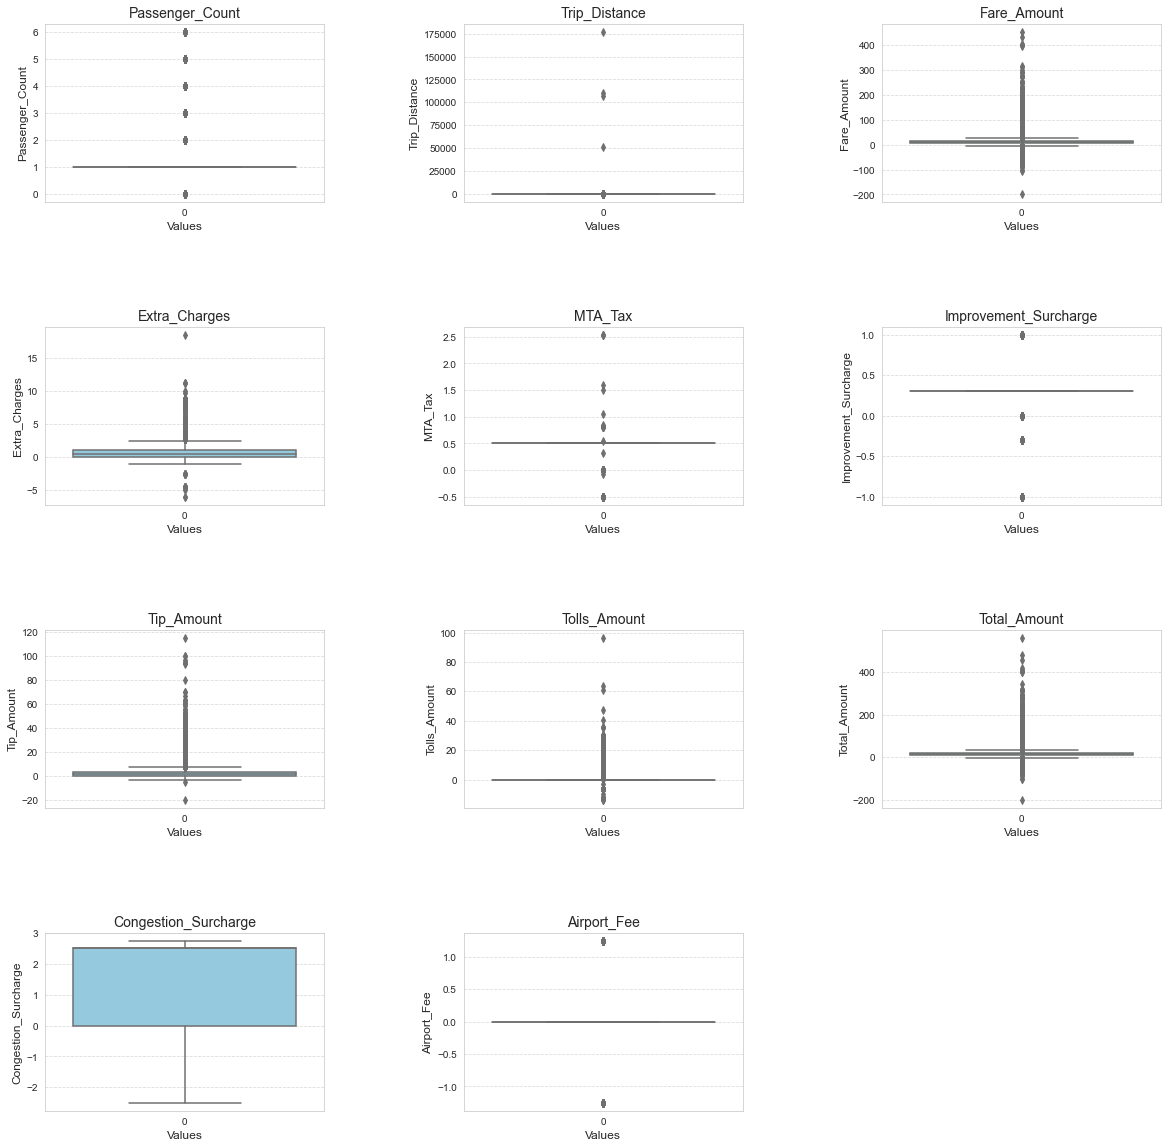

In [715]:
# Define the columns for which we want to plot box plots
outlier_columns = ['Passenger_Count', 'Trip_Distance', 'Fare_Amount', 'Extra_Charges', 
                   'MTA_Tax', 'Improvement_Surcharge', 'Tip_Amount', 'Tolls_Amount', 
                   'Total_Amount', 'Congestion_Surcharge', 'Airport_Fee']

# Create the figure for plotting
fig = plt.figure(figsize=(20, 20))

# Define the grid
gs = gridspec.GridSpec(4, 3, width_ratios=[1, 1, 1], 
                       wspace=0.5, # horizontal space
                       hspace=0.7  # vertical space
                      )

# Loop through each column to create box plots one by one
for i in range(len(outlier_columns)):
    ax = plt.subplot(gs[i])  # Using gridspec to define subplot
    
    # Plot the boxplot for the current column
    sns.boxplot(taxi_df_cleaned[outlier_columns[i]], color='skyblue', ax=ax)
    
    # Set title for the subplot to be the column name
    ax.set_title(outlier_columns[i], fontsize=14)
    
    # Adding x and y-axis labels
    ax.set_xlabel('Values', fontsize=12)
    ax.set_ylabel(outlier_columns[i], fontsize=12)
    
    # Add a grid for better readability
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Display all the plots
plt.show()


In the upcoming **Outlier Analysis** section, we will examine and address outliers in each of the **11 columns**.


# 2.6  Outliers Analysis 📉:

Now, We will go through each above boxplot's to identify and address the outliers. 

 For each column, we will Conduct:
 -  Visual Examination
 - Perform statistical examination
 - Address outliers
 - Conclude our findings
 - Any supporting points will be displayed as needed.


##  2.6.1`Passenger_Count` Outliers 🚖:


In our data, taxi rides with 4, 5, or 6 passengers aren't as frequent as other counts. Because of this, they might seem like "outliers."

**However, some key points to consider:**

- Bigger taxis or vans can fit 4, 5, or 6 passengers, especially when it's a family or a group of friends.
- To really understand if these counts are outliers, we would need more details about the taxi. Knowing the `taxi's ID` or `how many seats it has` would be very helpful.

**In conclusion:** Without extra details about the taxis, even though these counts are less common in our data, they still make sense in the real world of taxis. Therfore, we will not use any methods to replace these outliers.

##  2.6.2 `Trip_Distance` Outliers 🛣️:

### a. Visual Examination: 🔍


We'll start by plotting a boxplot for `Trip_Distance` to visually identify potential outliers.

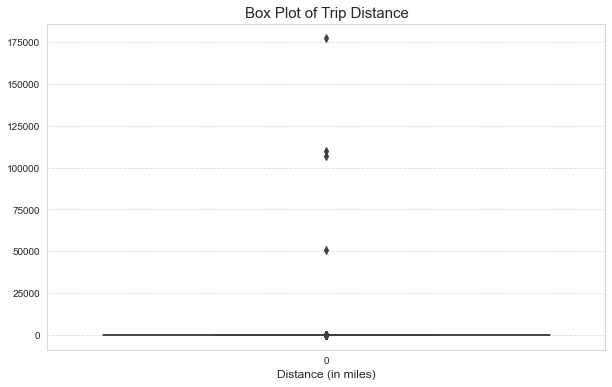

In [716]:
# Set the figure size for the plot
plt.figure(figsize=(10,6))

# Create a boxplot for the 'Trip_Distance' column of the taxi_df_original DataFrame
# This will help in visualizing the distribution of trip distances and potential outliers
sns.boxplot(taxi_df_original['trip_distance'])

# Set the title for the plot to provide context
plt.title('Box Plot of Trip Distance', fontsize=15)

# Label the x-axis for clarity
plt.xlabel('Distance (in miles)', fontsize=12)

# Add a horizontal grid to the plot to improve readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()

The box plot for the `Trip_Distance column indicates the presence of outliers. While most trips seem to have a reasonable distance (within the whiskers of the box plot), there are a few data points that stand out significantly from the others, suggesting they are extreme outliers.

### b. Statistical Examination: 📈


Next, let's statistically examine the `Trip_Distance` column to identify the extreme values and the negative values.

In [717]:
# 2.6.6.2 Statistical Examination: 📈
# Displaying the top 5 largest values and any negative values for trip_distance
largest_trip_distances = taxi_df_original['trip_distance'].nlargest(5)
negative_trip_distances = taxi_df_original[taxi_df_original['trip_distance'] < 0]['trip_distance']

largest_trip_distances, negative_trip_distances


(225386    177247.40
 231234    109814.68
 228234    106894.82
 142053     50992.70
 159941       172.22
 Name: trip_distance, dtype: float64,
 113588    -3.48
 113622   -16.86
 113932    -8.52
 114005    -0.32
 114198    -6.17
 114620   -10.70
 117343    -7.33
 120718    -0.55
 121223    -2.06
 Name: trip_distance, dtype: float64)

**Upon examination:**

- The top 5 largest values for `Trip_Distance` are:
    - **177247.40** 
    - **109814.68** 
    - **106894.82** 
    - **50992.70**
    - **172.22**

- We have also identified **nine** records with **negative** `Trip_Distance` values, which are **not logical** for this context.

### Supporitng Point 

We'll retain the value of **172.22 miles** since it's supported by its **respective total_amount** and is reasonable.

In [718]:
supporting_df = taxi_df_original[(taxi_df_original["trip_distance"] == 172.22)]

#Get only Trip_Distance and Total_Amount columns for better readability
supporting_df[["trip_distance", "total_amount"]].sort_values(by="trip_distance", ascending=False)

,trip_distance,total_amount
159941,172.22,408.91


Up on Inspection, 172.22 Values is completely reasonable with respective to `Total_Amount` which is **408.91** 

### c. Addressing Outliers in Trip_Distance 🛠️


To address remaining outliers:
    
- For the extreme high `Trip_Distance` values (those greater than 172.22), we will employ the **Unit Rate Analysis / Proportional Analysis** method to impute these values based on their respective total_amount.

- Similarly, for the negative `Trip_Distance` values, we will use the Unit Rate Analysis / Proportional Analysis method to impute positive values based on their respective total_amount.


Let's proceed with addressing these outliers.

In [719]:
# Calculating the unit rate (average trip distance per dollar) based on the entire dataset
unit_rate = taxi_df_cleaned['Trip_Distance'].sum() / taxi_df_cleaned['Total_Amount'].sum()

# Identifying the indices of outliers which are greater than 172.22 miles
outlier_indices_high = taxi_df_cleaned[taxi_df_cleaned['Trip_Distance'] > 172.22].index

# Using Unit Rate Analysis to impute the trip_distance for these outliers based on their respective total_amount
for index in outlier_indices_high:
    taxi_df_cleaned.at[index, 'Trip_Distance'] = unit_rate * taxi_df_cleaned.at[index, 'Total_Amount']

# Using Unit Rate Analysis to impute the trip_distance for negative values based on their respective total_amount
for index in negative_trip_distances.index:
    taxi_df_cleaned.at[index, 'Trip_Distance'] = unit_rate * taxi_df_cleaned.at[index, 'Total_Amount']

# Displaying the corrected values for the previously identified outliers
corrected_values = taxi_df_cleaned.loc[outlier_indices_high.tolist() + negative_trip_distances.index.tolist(), ['Trip_Distance', 'Total_Amount']]
corrected_values


,Trip_Distance,Total_Amount
142053,4.370738,18.15
225386,18.390812,76.37
228234,5.579614,23.17
231234,6.723471,27.92
113588,5.208763,21.63
113622,11.657708,48.41
113932,9.071388,37.67
114005,8.288749,34.42
114198,7.771003,32.27
114620,12.498142,51.90


Outliers Addressed in the Trip Distance Column

1. **Extreme High Trip Distance Values:**

- The trip originally recorded at **50992.70** miles for **\$18.15** has been corrected to **4.37 miles**.
- The trip originally recorded at **177247.40** miles for **\$76.37** has been corrected to **18.39 miles**.
- The trip originally recorded at **106894.82** miles for **\$23.17** has been corrected to **5.58 miles**.
- The trip originally recorded at **109814.68** miles for **\$27.92** has been corrected to **6.72 miles.**

2. **Negative Trip Distance Values:**

- The trip originally recorded at **-3.48 miles** for **\$21.63** has been corrected to **5.21 miles.**
- The trip originally recorded at **-16.86 miles** for **\$48.41** has been corrected to **11.66 miles.**
... (and so forth for the other negative values)
These corrections were made based on the average trip distance per dollar, aligning them better with the rest of the dataset.

### d. Contextual Analysis and Conclusion: 📝

- The `Trip_distance` column had outliers, some of which were extreme values, while others were negative. These values were not logical in the context of taxi rides. By applying a proportional analysis based on the **Total_Amount**, we've addressed and corrected these outliers, ensuring data integrity and consistency.

- This approach aligns the outlier values with the general distribution of the data, making it more representative and accurate for further analysis or modeling.

Lets make a **Boxplot** again after updating the values

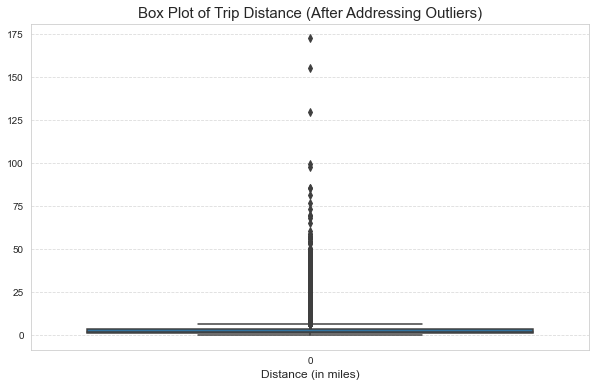

In [720]:
# Start by setting the size of the figure (plot) we want to create
plt.figure(figsize=(10,6))

# Create a box plot for the 'Trip_Distance' column from the taxi_taxi_df_original DataFrame
sns.boxplot(taxi_df_cleaned['Trip_Distance'])

# Set the title for the plot
plt.title('Box Plot of Trip Distance (After Addressing Outliers)', fontsize=15)

# Label the x-axis of the plot
plt.xlabel('Distance (in miles)', fontsize=12)

# Add a grid to the background of the plot to make it easier to read
# The linestyle option specifies the style of the gridlines
# The alpha option specifies the transparency of the gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()


Up on the inspection the updated boxplot, we can clearly see that there are **no negative values** and **high values**

## 2.6.3 `Fare_Amount` Analysis

### a. Visual Examination : 📊


Let's begin by visually inspecting the data using a boxplot to get an idea of potential outliers.

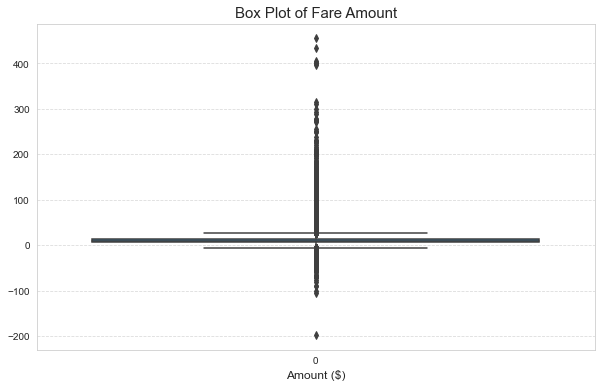

In [721]:
plt.figure(figsize=(10,6))
sns.boxplot(taxi_df_original['fare_amount'])
plt.title('Box Plot of Fare Amount', fontsize=15)
plt.xlabel('Amount ($)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

From this boxplot, we can identify any **extreme high values and low values**

###  b. Statistical Examination: 🔍


To dive further into these extreme values, we'll examine the **highest fare amounts** and potentially the lowest if there are any **negative values**:



In [722]:
# Checking the largest fare amounts
top_fares = taxi_df_original['fare_amount'].nlargest(10)
print("Top 10 Fare Amounts:")
print(top_fares)

# Checking for negative fare amounts
negative_fares = taxi_df_original[taxi_df_original['fare_amount'] < 0]
print("\nNumber of Negative Fare Amounts:", len(negative_fares))


Top 10 Fare Amounts:
296973    455.0
148530    434.5
304175    404.8
21486     400.0
41504     400.0
290292    400.0
267930    396.0
300304    315.0
55355     311.0
159941    300.0
Name: fare_amount, dtype: float64

Number of Negative Fare Amounts: 1162


We are aiming to understand if the largest fare amounts are **genuine or potential mistakes**. Also, there are **1162**  **negative fare amounts** which are **illogical** in the `fare_amount` context and should be addressed.

### c.  Addressing Outliers in fare_amount: 🛠️


In [723]:
# Calculate the median of fare_amount
median_fare = taxi_df_cleaned['Fare_Amount'].median()

# Replace negative fare amounts with the median
taxi_df_cleaned['Fare_Amount'] = np.where(taxi_df_cleaned['Fare_Amount'] < 0, median_fare, taxi_df_cleaned['Fare_Amount'])

# Define an upper threshold for fare_amount
threshold_fare = 300

# Replace values exceeding our threshold with the median
taxi_df_cleaned['Fare_Amount'] = np.where(taxi_df_cleaned['Fare_Amount'] > threshold_fare, median_fare, taxi_df_cleaned['Fare_Amount'])


### d. Contextual Analysis and Conclusion: 📝

- We've replaced negative values with the median. For extremely high values, 
- we've set a threshold of 300. Any values exceeding this threshold have also been replaced with the median.


### e. Verification ✅ 

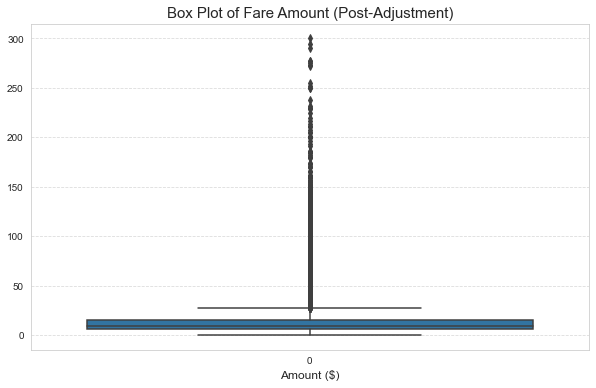

In [724]:
plt.figure(figsize=(10,6))
sns.boxplot(taxi_df_cleaned['Fare_Amount'])
plt.title('Box Plot of Fare Amount (Post-Adjustment)', fontsize=15)
plt.xlabel('Amount ($)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**Observation**: After our modifications, the `Fare_Amount` column should be free from extreme outliers and set for further studies.



## 2.6.4 Extra_Charges Analysis: 📊


### a. Visual Examination: 🔍


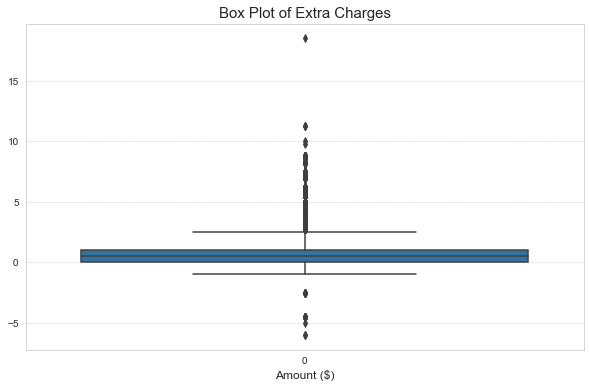

In [725]:
plt.figure(figsize=(10,6))
sns.boxplot(taxi_df_original['extra'])
plt.title('Box Plot of Extra Charges', fontsize=15)
plt.xlabel('Amount ($)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Through a visual examination using a boxplot, we observed that the `Extra_Charges` column had a few high values and few low values (which are illogic), with the maximum being \$18.50 and the minimum being \$-6.0.


### b. Statistical Examination: 📈

In [726]:
# Checking the largest extra charges amounts
taxi_df_original.extra.nlargest(5)


49735     18.50
301507    11.25
301601    11.25
304166    11.25
304690    10.00
Name: extra, dtype: float64

A closer statistical look at the top values revealed charges like $18.50, $11.25, and $10.00, among others.

In [727]:
# Checking the smallest extra charges amounts
Negative_Charges = taxi_df_original[taxi_df_original['extra']<0]

#Checking the number of records which holds Extra charges amount < 0
len(Negative_Charges)

541

Up on Inspection, we found there are **541** records which holds `Extra_Charges` amount <0 (which is illogical) and considered them as **outliers**

### c. Addressing Outliers in Extra Charges: 🛠️

In [728]:
# Calculate the median of Extra Charges
median_fare = taxi_df_cleaned['Extra_Charges'].median()

# Replace negative Extra Charges with the median
taxi_df_cleaned['Extra_Charges'] = np.where(taxi_df_cleaned['Extra_Charges'] < 0, median_fare, taxi_df_cleaned['Extra_Charges'])

In [729]:
#Rechecking to display the lowest Extra Charge 

taxi_df_cleaned['Extra_Charges'].min()

0.0

Now, It is clear that there are **no negative** amount in `Extra Charges`

### d. Contextual Analysis and Conclusion: 📝


The extra charges in taxi fare data can encompass various additional fees, such as night surcharges, rush hour charges, or other special conditions. Given the nature of such charges, it's plausible for certain trips to incur multiple extra charges, leading to higher overall extra charges for some rides.

Considering our data and the nature of taxi fares, an extra charge of $18.50, while being on the higher end, doesn't necessarily indicate an error or outlier.

**In conclusion**: Based on our analysis and understanding of the data, we don't consider the high values in the `Extra_Charges` column as outliers. They seem to be genuine observations that reflect the variability in extra charges applied to taxi rides.

## 2.6.5 `MTA_TAX` (Metropolitan Transportation Authority) Analysis: 📊


### a. Visual Examination: 🔍


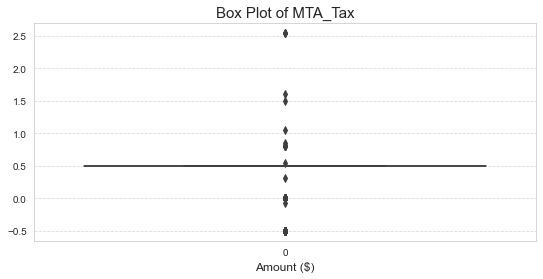

In [730]:
# Start by setting the size of the figure (plot) we want to create
plt.figure(figsize=(9,4))

# Create a box plot for the 'MTA_Tax' column from the taxi_df_original DataFrame
# This visually represents the distribution of the data, highlighting potential outliers
sns.boxplot(taxi_df_original['mta_tax'])

# Set the title for the plot, describing what the plot represents
plt.title('Box Plot of MTA_Tax', fontsize=15)

# Label the x-axis of the plot, indicating what the numeric values represent (in this case, amounts in dollars)
plt.xlabel('Amount ($)', fontsize=12)

# Add a grid to the background of the plot to make it easier to read
# The linestyle option specifies the style of the gridlines
# The alpha option specifies the transparency of the gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot to the screen
plt.show()


According to the data dictionary, each trip should incur a `MTA_TAX` of **\$0.50**. 

Any value **greater than or less than** **\$0.50** can be deemed as outliers or data entry mistakes. In such cases, we will adjust these values to the **standard \$0.50**.

### b. Statistical Examination: 📈


In [731]:
#We will check how many records are greater than $0.50

greater_MTA_Tax = taxi_df_original[taxi_df_original['mta_tax']>0.50]
greater_MTA_Tax.size

285

Up on Inspection, we found there are **285** data points which is having greater than $0.50

In [732]:
#Now, We will check how many records are lesser than $0.50

lesser_MTA_Tax = taxi_df_original[taxi_df_original['mta_tax']<0.50]
lesser_MTA_Tax.size

63080

Up on Inspection, we found there are **63080** data points which is having lesser than $0.50

### 2.6.5.3  Addressing Outliers in  MTA_Tax 🛠️

In [733]:
# Replace MTA_Tax with $0.50 which are greater and lesser than 0.50
taxi_df_cleaned.loc[(taxi_df_cleaned['MTA_Tax'] > 0.50) | (taxi_df_cleaned['MTA_Tax'] < 0.50), 'MTA_Tax'] = 0.50

In [734]:
#Rechecking to display the min and max MTA_Tax

Min_MTA_Tax= taxi_df_cleaned.MTA_Tax.min()
Max_MTA_Tax= taxi_df_cleaned.MTA_Tax.max()

print(f'Minimun MTA_Tax is {Min_MTA_Tax} \nMaximum MTA_Tax is {Max_MTA_Tax}')

Minimun MTA_Tax is 0.5 
Maximum MTA_Tax is 0.5


### 2.6.5.4 Contextual Analysis and Conclusion: 📝


Now, Its **confirmed** that all the datapoints which has **lower and greater than 0.50** are **replaced with 0.50**

## 2.6.6 `Improvement Surcharge` Analysis: 📊


### a. Visual Examination: 🔍


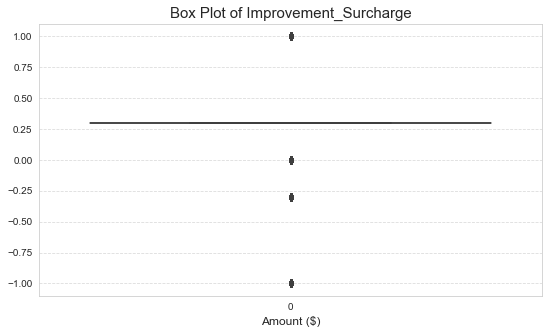

In [735]:
# Start by setting the size of the figure (plot) we want to create
plt.figure(figsize=(9,5))

# Create a box plot for the 'Improvement_Surcharge' column from the taxi_df_original DataFrame
# This visually represents the distribution of the data, highlighting potential outliers
sns.boxplot(taxi_df_original['improvement_surcharge'])

# Set the title for the plot, describing what the plot represents
plt.title('Box Plot of Improvement_Surcharge', fontsize=15)

# Label the x-axis of the plot, indicating what the numeric values represent (in this case, amounts in dollars)
plt.xlabel('Amount ($)', fontsize=12)

# Add a grid to the background of the plot to make it easier to read
# The linestyle option specifies the style of the gridlines
# The alpha option specifies the transparency of the gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot to the screen
plt.show()


As we can observe the above boxplot, its evident that there are some datapoints which are **less than 0**, and we can consider them as a outliers.

### b. Statistical Examination: 📈


In [736]:
#Lets check how many records are less than zero, and will replace them with "1"

taxi_df_original[taxi_df_original["improvement_surcharge"]<0].size

22040

Up on Inspection, there are **22040** datapoints which are less than **0**

### c. Addressing Outliers in  Improvement_Surcharge 🛠️

In [737]:
#We will replace those datapoints with 1
taxi_df_cleaned.loc[(taxi_df_cleaned['Improvement_Surcharge']<0),  'Improvement_Surcharge'] = 1

In [738]:
#Rechecking to display the Improvement_Surcharge datapoints that are less than 1

taxi_df_cleaned[taxi_df_cleaned["Improvement_Surcharge"]<0].size

0

Success! There are **0** datapoints which are less than **0** numerical value

### d. Contextual Analysis and Conclusion: 📝


Now, Its **confirmed** that all the datapoints which has lower than **0** are replaced with **1**

##  2.5.7 `Tip Amount` Outliers 🚖:


### a. Visual Examination: 🔍


By observing the box plot for `Tip_amount`, we can get an initial sense of potential outliers. Let's visualize the data.



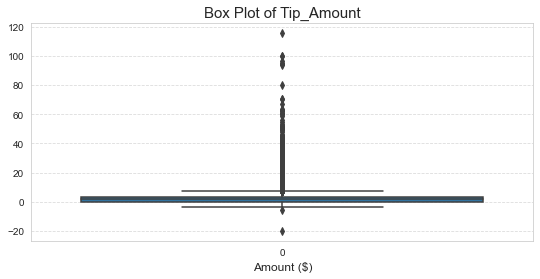

In [739]:
# Start by setting the size of the figure (plot) we want to create
plt.figure(figsize=(9,4))

# Create a box plot for the 'Tip_Amount' column from the taxi_df_original DataFrame
# This visually represents the distribution of the data, highlighting potential outliers
sns.boxplot(taxi_df_original['tip_amount'])

# Set the title for the plot, describing what the plot represents
plt.title('Box Plot of Tip_Amount', fontsize=15)

# Label the x-axis of the plot, indicating what the numeric values represent (in this case, amounts in dollars)
plt.xlabel('Amount ($)', fontsize=12)

# Add a grid to the background of the plot to make it easier to read
# The linestyle option specifies the style of the gridlines
# The alpha option specifies the transparency of the gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot to the screen
plt.show()


The boxplot clearly shows the presence of outliers, particularly on the higher end of the tip amounts. There are also a few **negative tip values**, which don't logically make sense and may represent data entry errors.

### b. Statistical Examination: 📈


**Objective**: To use statistical methods, specifically the **IQR**, to determine the bounds for outliers in the `Tip_Amount` column.

In [740]:
# Calculating the IQR for tip_amount
Q1 = taxi_df_original['tip_amount'].quantile(0.25)
Q3 = taxi_df_original['tip_amount'].quantile(0.75)
IQR = Q3 - Q1

# Defining bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound, upper_bound


(-4.425000000000001, 7.375000000000001)

Based on the **IQR method**, the statistical bounds for potential outliers in the `Tip_Amount` column are:

- Lower bound: −$4.43

- Upper bound: $7.38

Values outside of these bounds are statistically considered outliers.

### c. Addressing Outliers in tip_amount 🛠️


**Objective**: To handle the outliers in the `Tip_Amount` column by capping them. Specifically:
        
- Values above the upper bound will be set to the upper bound value.
- Values below the lower bound (or negative values) will be set to a minimum acceptable value (0 in our case).

Let's proceed with this capping strategy.



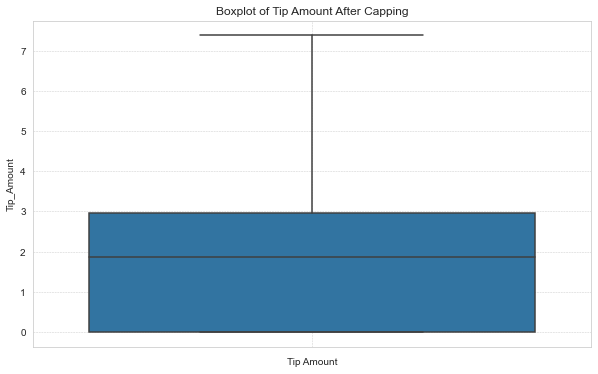

In [741]:
# Capping the outliers in tip_amount column

# Capping values above the upper bound
taxi_df_cleaned['Tip_Amount'] = taxi_df_cleaned['Tip_Amount'].where(taxi_df_cleaned['Tip_Amount'] <= upper_bound, upper_bound)

# Capping values below the lower bound to 0 (as negative tips don't make sense)
taxi_df_cleaned['Tip_Amount'] = taxi_df_cleaned['Tip_Amount'].where(taxi_df_cleaned['Tip_Amount'] >= 0, 0)

# Displaying the new distribution after capping
plt.figure(figsize=(10, 6))
sns.boxplot(y=taxi_df_cleaned['Tip_Amount'])
plt.title('Boxplot of Tip Amount After Capping')
plt.xlabel('Tip Amount')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


The boxplot now shows the distribution of the `Tip_Amount` column after capping the outliers. As seen, the extreme values have been addressed, and the data now stays within the bounds we defined.

### d. Contextual Analysis and Conclusion: 📝



- We visually inspected the tip_amount column using a boxplot, identifying a presence of outliers, especially on the higher end.

- Using the IQR method, we statistically identified outliers as values outside of the bounds −$4.43,$7.38.

- We addressed these outliers by capping values above the upper bound to $7.38 and values below 0 to 0, as **negative tips are not logical.**
- Post capping, our visual inspection confirms that the extreme values have been addressed.

This structured approach ensures that our data is prepared for subsequent analyses, with reduced influence from extreme outliers.

## 2.6.8 `Tolls Amount` Outliers:


### a. Visual Examination: 🔍

**Objective**: To visually inspect the distribution of the `Tolls_Amount` column and identify potential outliers.

**Boxplot**
- We will start by plotting a boxplot for the `Tolls_Amount` column to visually identify potential outliers.

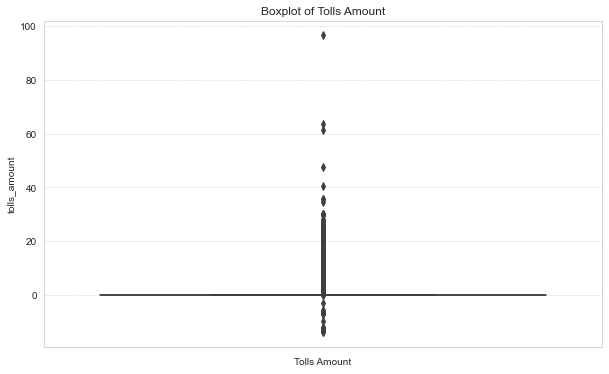

In [742]:
# Visual Examination using Boxplot for tolls_amount

plt.figure(figsize=(10, 6))
sns.boxplot(y=taxi_df_original['tolls_amount'])
plt.title('Boxplot of Tolls Amount')
plt.xlabel('Tolls Amount')
plt.grid(True, axis = "y", which='both', linestyle='--', linewidth=0.5)
plt.show()

The boxplot for the `Tolls_Amount` column indicates the **presence of outliers**, especially on the higher end. Most of the data is clustered around the lower values, with several data points extending beyond the "whiskers" of the boxplot, signaling potential outliers. Additionally, it is evident that there are some **negative values**, likely represent data entry errors.


### b. Statistical Examination: 📈

**Objective**: To statistically examine the `Tolls_Amount` column, focusing on values **less than zero.** and high tolls amount as well.

Let's check the number of rows where the `Tolls_Amount` is negative.

In [743]:
# Checking the number of rows with negative tolls_amount
negative_tolls_count = (taxi_df_original['tolls_amount'] < 0).sum()

negative_tolls_count

38

There are **38** entries in the `Tolls_Amount` column with **negative values**, which we consider as data entry errors because **Negative** `Tolls Amount` can be **impracticable**



### c. Addressing Outliers in tolls_amount 🛠️

**Objective**: To handle the detected data entry errors in the `Tolls_Amount` column by imputing **negative values with zero**.

Let's proceed with this imputation strategy.

In [744]:
# Imputing negative values in tolls_amount with 0
taxi_df_cleaned['Tolls_Amount'] = taxi_df_cleaned['Tolls_Amount'].where(taxi_df_cleaned['Tolls_Amount'] >= 0, 0)

# Verify if there are no more negative values in tolls_amount column
negative_tolls_count_after_imputation = (taxi_df_cleaned['Tolls_Amount'] < 0).sum()

negative_tolls_count_after_imputation


0

All negative values in the `Tolls_Amount` column have been successfully imputed to **zero**. There are **no** more negative values in this column.

### d. Contextual Analysis and Conclusion: 📝

- Relying on domain knowledge, we recognized that negative values in the tolls_amount column were illogical and needed correction.
- We visually inspected the `Tolls_Amount` column and identified negative values.
- We recognized these negative values as data entry errors based on domain knowledge and logic.
- We addressed these errors by imputing negative values with zero, ensuring the data is better prepared for subsequent analyses.

##    2.6.9 `Total Amount Outliers: 💰


### a. Visual Examination:

First, we visually inspect the distribution of `Total_Amount` to identify potential outliers.

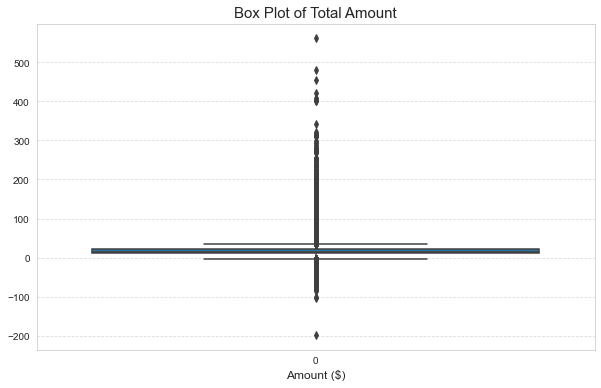

In [745]:
# Visual Examination for total_amount
plt.figure(figsize=(10,6))
sns.boxplot(taxi_df_original['total_amount'])
plt.title('Box Plot of Total Amount', fontsize=15)
plt.xlabel('Amount ($)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### b. Statistical Examination, Thought Process and Data Display:

After the visual inspection, we dive deeper into the data to understand specific anomalies.

1. **Negative** `Total_Amount`:
- These could arise due to discounts or promotional offers. However, when paired with a **Trip_Distance** of 0, it could indicate trips that were booked but perhaps **cancelled** before starting. Conversely, a positive `Trip_Distance` with a negative `Total_Amount` could mean the customer used a substantial discount or coupon.

Total amount can be negtaive in some scenarios for example customer used **discount code or copoun** for ride, and this reason leads to negatibe `Total_Amount`

In [746]:
negative_total_positive_distance = taxi_df_original[(taxi_df_original['total_amount'] < 0) & (taxi_df_original['trip_distance'] > 0)]
display(negative_total_positive_distance[['total_amount', 'trip_distance']])

,total_amount,trip_distance
4095,-6.80,0.96
5442,-3.30,0.09
7366,-9.30,0.61
9186,-5.80,0.43
11098,-4.80,0.60
...,...,...
304548,-71.55,18.55
304570,-34.60,7.14
304626,-11.90,0.68
304801,-14.00,0.74


As we can see, there are **1007** Total_Amount **negative values**

2. **Positive** `Total_Amount` with **zero** `Trip_Distance`:
- This situation is peculiar. While a positive fare suggests a service was rendered, a zero distance indicates no service. This might be due to data entry errors, malfunctioning meters, or situations where the fare was based on time rather than distance (e.g., waiting in traffic).


In [747]:
positive_total_zero_distance = taxi_df_original[(taxi_df_original['total_amount'] > 0) & (taxi_df_original['trip_distance'] == 0)]
display(positive_total_zero_distance[['total_amount', 'trip_distance']])


,total_amount,trip_distance
137,3.30,0.0
317,3.30,0.0
846,3.80,0.0
870,11.80,0.0
886,63.56,0.0
...,...,...
304660,17.35,0.0
304701,28.70,0.0
304715,16.45,0.0
304877,39.50,0.0


### c. Addressing Outliers in Total_Amount 🛠️:
1. Negative `Total_Amount`: Retain these records as they provide valuable information.

2. Positive `Total_Amount` with **zero** `Trip_Distance`: Use **Unit Rate Analysis** or **Proportional Analysis** to estimate the likely distance for these fares.

In [748]:
# Calculating the average trip distance per dollar for the dataset
unit_rate = taxi_df_cleaned['Trip_Distance'].sum() / taxi_df_cleaned['Total_Amount'].sum()

# Imputing trip_distance values using Unit Rate Analysis
positive_amount_zero_distance_indices = taxi_df_cleaned[(taxi_df_cleaned['Total_Amount'] > 0) & (taxi_df_cleaned['Trip_Distance'] == 0)].index
for index in positive_amount_zero_distance_indices:
    taxi_df_cleaned.at[index, 'Trip_Distance'] = unit_rate * taxi_df_cleaned.at[index, 'Total_Amount']

### 2.6.9.5 Conclusion:

By examining the `Total_Amount` column alongside `Trip_Distance`, we have addressed potential inconsistencies. This process ensures that the dataset is both statistically coherent and contextually relevant.

## 2.6.10 `Congestion_Surcharge` Outliers:

### a. **Visual Examination**:

We begin by visually inspecting the distribution of the `Congestion_Surcharge` to identify any potential outliers.

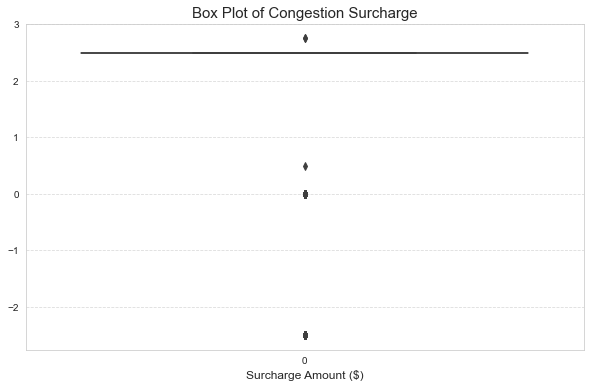

In [749]:
# Visual Examination of congestion_surcharge
plt.figure(figsize=(10,6))
sns.boxplot(taxi_df_original['congestion_surcharge'])
plt.title('Box Plot of Congestion Surcharge', fontsize=15)
plt.xlabel('Surcharge Amount ($)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


As we can observe from above boxplot, congestion_sucharge is in negative value of (-2.5), lets examine further with Statistical Examination and Data Display:

### b. Statistical Examination and Data Display:

**Negative congestion_surcharge:**



In [750]:
# Fetching records with negative congestion surcharge
negative_congestion = taxi_df_original[taxi_df_original['congestion_surcharge'] < 0]
print(f"Number of records with negative congestion surcharge: {len(negative_congestion)}")

# Displaying the total_amount values associated with negative congestion surcharges
display(negative_congestion[['congestion_surcharge', 'total_amount']])

Number of records with negative congestion surcharge: 891


,congestion_surcharge,total_amount
65450,-2.5,-7.8
66202,-2.5,-6.3
66380,-2.5,-9.8
70927,-2.5,-72.8
74589,-2.5,-7.3
...,...,...
304537,-2.5,-74.0
304570,-2.5,-34.6
304626,-2.5,-11.9
304801,-2.5,-14.0


These records corroborate the hypothesis that customers might have used **discount codes** or **received refunds**. The associated `Total_Amount` being negative supports this theory.

### d Conclusion:

The negative values in the `Congestion_Surcharge` column are justified by corresponding negative values in the `Total_Amount` column, indicating possible discounts, refunds, or promotions. The positive surcharge values, including the maximum of **$2.5**, are within reasonable bounds. Given these observations, we have decided not to treat these values as outliers and will retain them as they provide valuable information about the data.


## 2.6.11 `Aiport Fee` Outliers



### a. **Visual Examination:**

Starting with a visual inspection of the distribution of the` Airport_Fee` helps identify any potential outliers.

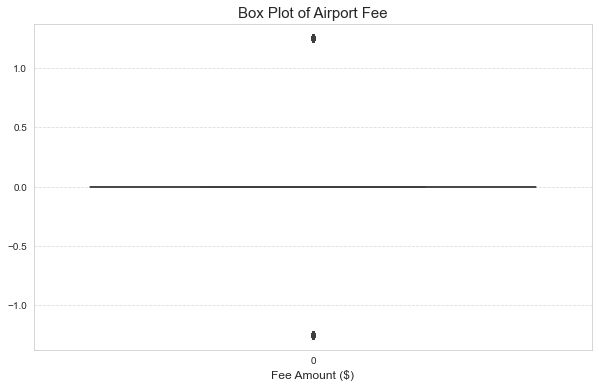

In [751]:
# Visual Examination of airport_fee
plt.figure(figsize=(10,6))
sns.boxplot(taxi_df_original['airport_fee'])
plt.title('Box Plot of Airport Fee', fontsize=15)
plt.xlabel('Fee Amount ($)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

As we can observe from above boxplot, `Aiport_Fee` is in negative value of (-1.5), lets examine further with Statistical Examination and Data Display:

### b Statistical Examination and Data Display:

**Negative** `Airport_Fee`:


In [752]:
# Fetching records with negative airport fee
negative_airport_fee = taxi_df_original[taxi_df_original['airport_fee'] < 0]
print(f"Number of records with negative airport fee: {len(negative_airport_fee)}")

# Displaying the total_amount values associated with negative airport fees
display(negative_airport_fee[['airport_fee', 'total_amount']])


Number of records with negative airport fee: 55


,airport_fee,total_amount
208481,-1.25,-4.55
211017,-1.25,-21.55
212539,-1.25,-28.55
215759,-1.25,-57.55
216453,-1.25,-37.05
217539,-1.25,-32.05
217908,-1.25,-29.05
218747,-1.25,-58.55
218766,-1.25,-63.10
224962,-1.25,-28.55


Observing these records, we can deduce that the negative values in the `Airport_Fee` column might arise from customers using **discount codes**, **getting refunds**, or other similar reasons. The associated `Total_Amount` further supports this understanding.

### 2.6.11.4 Conclusion:
The negative values in the Airport_Fee column are aligned with the corresponding Total_Amount values, indicating potential **discounts**, **refunds**, or **promotions**. The **positive fee values appear within expected bounds**, considering **domain knowledge**. Based on these observations, **we decide not to categorize** these values as **outliers** and choose to retain them, valuing the insights they offer.

This was end of identifying and addressing **outliers**, Lets move to the next section which is **EDA (Exploratory Data Analysis)**

##  3.0 Exploratory Data Analysis (EDA) 📊 - A Deep Dive 🌊

###  Purpose 🎯:

Exploratory Data Analysis (EDA) is the first step in your data analysis process. Here, one formulates theories or hypotheses by visualizing and understanding the patterns, relationships, etc., in the data. The insights drawn from EDA are crucial in guiding further data analysis and modeling efforts.

#### Note: We will not perform any outlier analysis because we already perfomed outliers in previous section

###  Why EDA ? 🚀

1. **🔍 Understand the Data:** Before we can use the data for any analysis or modeling, we need to understand its structure, distribution, and quality. 
2. **🧪 Test Assumptions:** Many statistical and machine learning models have underlying assumptions. EDA helps in testing some of these assumptions.
3. **📉 Identify Patterns:** Recognizing patterns can provide insights and guide subsequent analyses.
4. **🌐 Inform Further Analysis:** The observations made during EDA can guide further queries, data collection, or analyses.

###  Our Approach to EDA📈:

1. **Distribution Analysis:** 📦  
   Dive deep into the distribution of key metrics in the dataset. Understand the spread, skewness, and potential outliers.
   
2. **Time-based Analysis:** ⏰  
   Unearth temporal patterns, trends, and seasonality in the data.
   
3. **Relationship Analysis:** ❤️  
   Investigate how various metrics relate to and impact one another.
   
4. **Categorical Analysis:** 🏷️  
   Break down key metrics by categories to unearth categorical patterns and differences.

Let's embark on this data exploration journey and uncover the stories hidden within the dataset! 🌟

## 3.1  Distribution Analysis 📈

**Purpose:** 🎯
The goal of distribution analysis is to **understand the spread**, **skewness**, **central tendency**, and potential outliers of key metrics in our dataset. This foundational knowledge is crucial as it informs how we interpret subsequent analyses and how we might preprocess the data for further modeling or analysis. By visualizing and understanding the distributions, we can gain insights into the typical behavior in our dataset and identify any data points that deviate from this behavior.

#### **Structure of the Distribution Analysis**

1. **Fare Amount & Other Monetary Metrics**
We will  visualize and describe the distribution of key monetary metrics like `Fare_Amount`, `Tip_Amount`, and `Total_Amount` using histograms, boxplots, and descriptive statistics.

2. 🚖 **Trip Distance**
    We will  analyze the distribution of `Trip Distances` to understand the frequency of **short vs. long rides**.

3. 👥 **Passenger Count**
    We will check the distribution of the **number of passengers per trip**.

Let's dive in!

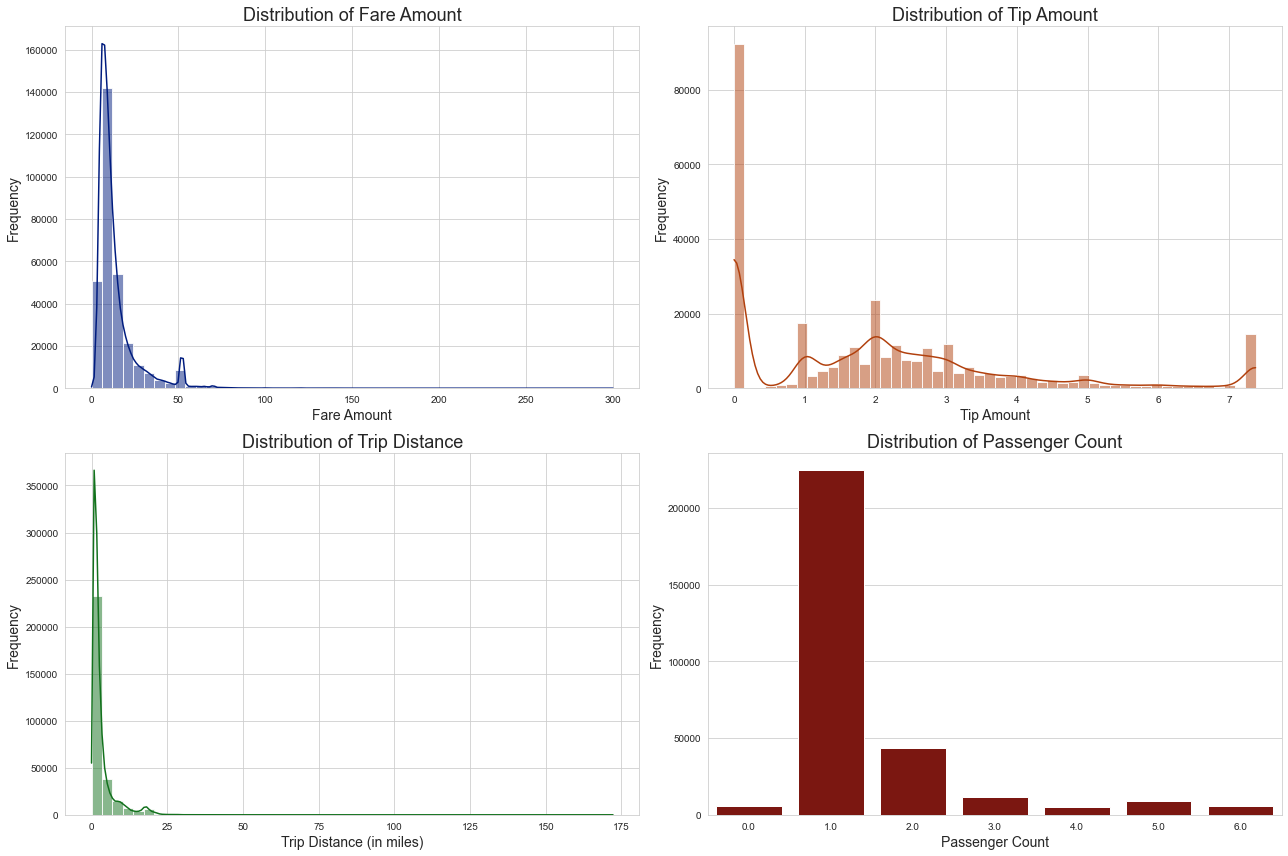

In [753]:
# Set a dark color palette
dark_palette = sns.color_palette("dark", 4)

# Setting up the figure and axis for subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))

# Plotting histograms for Fare Amount & Other Monetary Metrics
sns.histplot(taxi_df_cleaned['Fare_Amount'], bins=50, ax=axes[0, 0], color=dark_palette[0], kde=True)
axes[0, 0].set_title('Distribution of Fare Amount', fontsize=18)
axes[0, 0].set_xlabel('Fare Amount', fontsize=14)
axes[0, 0].set_ylabel('Frequency', fontsize=14)

sns.histplot(taxi_df_cleaned['Tip_Amount'], bins=50, ax=axes[0, 1], color=dark_palette[1], kde=True)
axes[0, 1].set_title('Distribution of Tip Amount', fontsize=18)
axes[0, 1].set_xlabel('Tip Amount', fontsize=14)
axes[0, 1].set_ylabel('Frequency', fontsize=14)

# Plotting the distribution of Trip Distance
sns.histplot(taxi_df_cleaned['Trip_Distance'], bins=50, ax=axes[1, 0], color=dark_palette[2], kde=True)
axes[1, 0].set_title('Distribution of Trip Distance', fontsize=18)
axes[1, 0].set_xlabel('Trip Distance (in miles)', fontsize=14)
axes[1, 0].set_ylabel('Frequency', fontsize=14)

# Plotting the distribution of Passenger Count
sns.countplot(data=taxi_df_cleaned, x='Passenger_Count', ax=axes[1, 1], palette=dark_palette[-1:])
axes[1, 1].set_title('Distribution of Passenger Count', fontsize=18)
axes[1, 1].set_xlabel('Passenger Count', fontsize=14)
axes[1, 1].set_ylabel('Frequency', fontsize=14)

plt.tight_layout()
plt.show()


Here are the **key observations** from the **distribution analysis**:

1. 💰 **Fare Amount & Other Monetary Metrics**:  

    - **Fare Amount**: The majority of the fare amounts are clustered in the low to mid-range, though there few high values but they are reasonable as pointed out in oulier analysis section
    - **Tip Amount**: Most tips are also in the low range, with a significant number of rides having **no tips** at all.
    
    
2. 🚖 **Trip Distance:**
    - The majority of the trips are short distances, with a peak around **1 mile**. There are, however, a few longer rides, as indicated by the tail of the distribution.
    
    
3. 👥 **Passenger Count:**
    - The most common scenario is a **single passenger**, followed by two passengers. Rides with more than **5 passengers** are relatively rare.


In [754]:
taxi_df_cleaned.Trip_Distance.mean()

3.1877973245825992

## 3.2 Time-Based Analysis 🕰️

**Purpose 🎯**

Time-based analysis helps us **uncover patterns**, **trends**, **seasonality**, and **cycles in our data**, which are often associated with temporal dimensions. By understanding these patterns, businesses can make better decisions and predictions. For a taxi service, this type of analysis can reveal peak demand times, the effect of holidays, and other temporal trends that can inform operational decisions, staffing, and marketing strategies.

**Thought Process:** 

 Given that this is the NewYorkTaxi Dataset, we will extract insights for:
 - **"Thanksgiving Day"** (which typically falls on the last Thursday of November).
 - **"Thanksgiving Week"** (the last week of November).  
 Additionally, we will analyze and derive insights for **"New Year's Eve"** (December 31st of every year).


**Structure:**

3.2.1 **Daily Patterns** 🌞🌜: Investigate any patterns or trends within individual days.  
3.2.2 **Weekly Patterns** 🗓️: Look at trends on a weekly basis to understand busy days vs. slow days.  
3.2.3 **Month-wise Analysis** 📆: Investigate if certain months are busier than others.  
3.2.3 **Special Occasions Analysis** 🎉:  
- a. **Thanksgiving Week Analysis** 🦃: Examine trends leading up to, during, and after Thanksgiving.  
- b. **Thanksgiving Day Analysis** 🍽️: Analyze the specific day of Thanksgiving to understand any unique trends.  
- c. **New Year's Eve Analysis** 🎆: Investigate patterns on New Year's Eve, a day that may see increased late-night rides.  

Let's start with the first step: **Overall Time Trend Analysis**.



 ### 3.2.1 Daily Patterns 🌞🌜
 
 To analyze daily patterns, we will look at:

- **Average metrics** (like fare amount and trip distance) by hour of the day to see when taxis are most commonly used and when they earn the most.
- **Volume of trips by hour** to understand peak and off-peak hours.
    - This will give us insights into **which hours are busiest**, **which hours have the longest trips**, and **which hours generate the most revenue**.

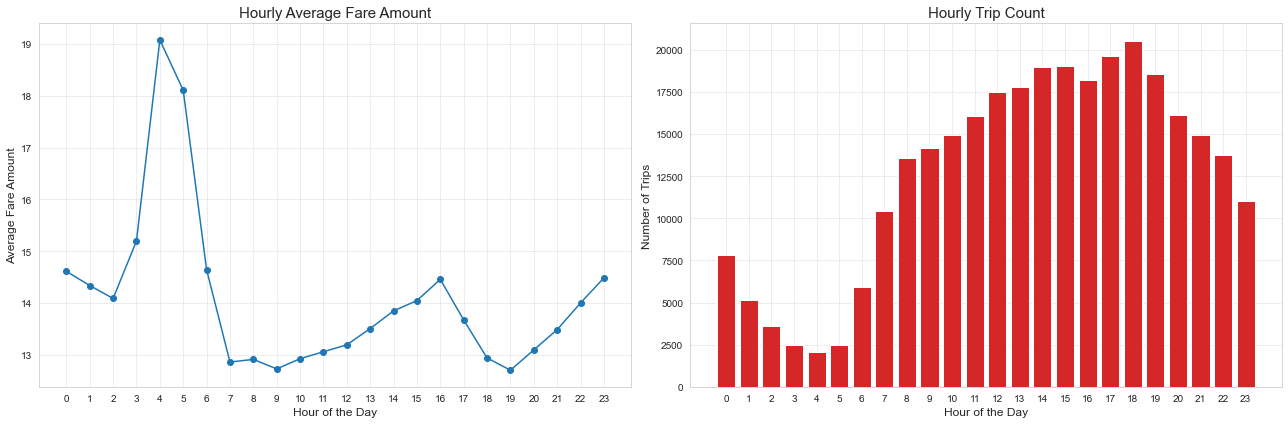

In [755]:
# Extracting the hour from the pickup datetime
taxi_df_cleaned['pickup_hour'] = taxi_df_cleaned['Pickup_Datetime'].dt.hour

# Grouping by hour to calculate average metrics
hourly_avg_metrics = taxi_df_cleaned.groupby('pickup_hour')[['Fare_Amount', 'Trip_Distance']].mean()
hourly_trip_count = taxi_df_cleaned.groupby('pickup_hour').size()

# Setting up the figure for subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Plotting Average Fare Amount by Hour
axes[0].plot(hourly_avg_metrics.index, hourly_avg_metrics['Fare_Amount'], color='tab:blue', marker='o')
axes[0].set_xlabel('Hour of the Day', fontsize=12)
axes[0].set_ylabel('Average Fare Amount', fontsize=12)
axes[0].set_title('Hourly Average Fare Amount', fontsize=15)
axes[0].set_xticks(range(0, 24))
axes[0].grid(True, which='both', linestyle='--', linewidth=0.5)

# Plotting Number of Trips by Hour
axes[1].bar(hourly_trip_count.index, hourly_trip_count.values, color='tab:red')
axes[1].set_xlabel('Hour of the Day', fontsize=12)
axes[1].set_ylabel('Number of Trips', fontsize=12)
axes[1].set_title('Hourly Trip Count', fontsize=15)
axes[1].set_xticks(range(0, 24))
axes[1].grid(True, which='both', linestyle='--', linewidth=0.5)

fig.tight_layout()
plt.show()


Here are the visualizations that depict the **Daily Patterns** 🌞🌜:

1. **Hourly Average Fare Amount** 📈: The graph on the **left** represents the **average fare amount by hour**. We can see that the fare amount tends to be **higher** in the **early morning hours**, potentially due to **less availability of cabs** or higher demand from late-night travelers or extra-charges for late hour.


2. **Hourly Trip Count** 📊: The graph on the **right** showcases the **number of taxi trips by hour**. The morning hours, especially around **6 AM to 8 AM**, witness a surge in taxi trips, probably due to the morning rush. Similarly, there's another peak during the **evening hours**, aligning with the evening commute.

Let's dive into insights based on these patterns:

### Insights from Daily Patterns: 💡

- **Morning Rush**: Starting from around **5 AM**, there's a steady increase in the number of taxi trips, peaking around **7-8 AM**. This suggests a high demand during the morning commute hours.


- **Evening Demand**: A more pronounced peak is observed during the evening hours, especially around **6-7 PM**, aligning with the evening rush as people head home or go out.


- **Late Night to Early Morning Slump**: The number of taxi trips drops significantly post-midnight and remains low until the early morning. This lull period, especially between **1 AM and 5 AM**, indicates reduced demand and activity.


- **Consistent Fare Amount**: The average fare amount remains relatively stable throughout the day, with slight variations. This suggests that while the volume of rides changes, the nature or length of the trips remains consistent.


- **Afternoon Stability**: Post the morning rush, there's a stable demand for taxis during the afternoon hours, from around **10 AM to 4 PM**, before it starts rising again for the evening peak.  



### 3.2.2 Weekly Patterns 🗓️ 

To analyze weekly patterns, we will look at:

**Average metrics** (like fare amount and trip distance) by day of the week to see if certain days are busier or more profitable than others.
**Volume of trips by day of the week** to understand which days see the most taxi usage.

This will help us discern patterns such as weekends being busier than weekdays or certain days having longer trips on average.

Let's begin by analyzing the patterns by day of the week.


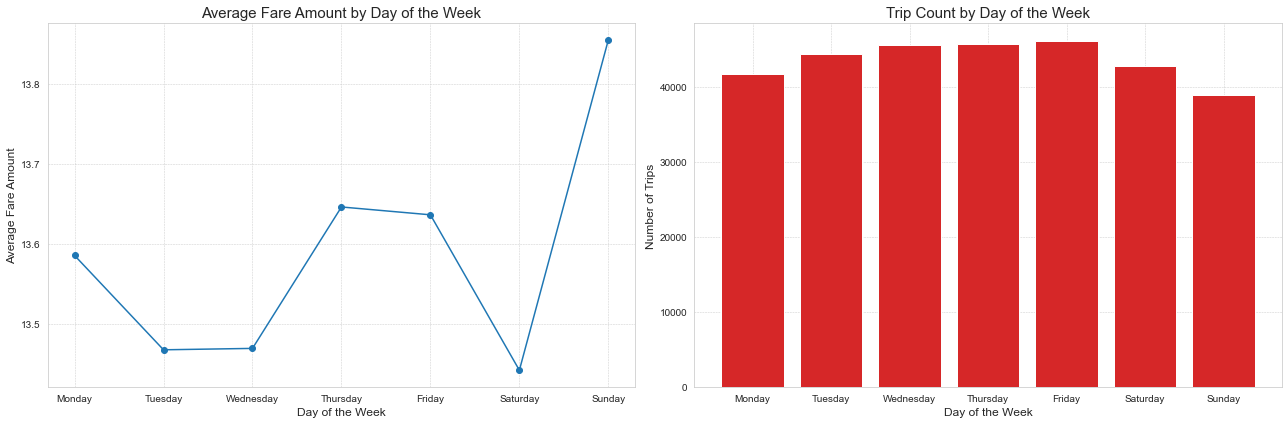

In [756]:
# Extracting the day of the week from the pickup datetime
taxi_df_cleaned['pickup_day_of_week'] = taxi_df_cleaned['Pickup_Datetime'].dt.dayofweek

# Grouping by day of the week to calculate average metrics
weekly_avg_metrics = taxi_df_cleaned.groupby('pickup_day_of_week')[['Fare_Amount', 'Trip_Distance']].mean()
weekly_trip_count = taxi_df_cleaned.groupby('pickup_day_of_week').size()

# Day of the week mapping
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Setting up the figure for subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Plotting Average Fare Amount by Day of the Week
axes[0].plot(days_of_week, weekly_avg_metrics['Fare_Amount'], color='tab:blue', marker='o')
axes[0].set_xlabel('Day of the Week', fontsize=12)
axes[0].set_ylabel('Average Fare Amount', fontsize=12)
axes[0].set_title('Average Fare Amount by Day of the Week', fontsize=15)
axes[0].grid(True, which='both', linestyle='--', linewidth=0.5)

# Plotting Number of Trips by Day of the Week
axes[1].bar(days_of_week, weekly_trip_count.values, color='tab:red')
axes[1].set_xlabel('Day of the Week', fontsize=12)
axes[1].set_ylabel('Number of Trips', fontsize=12)
axes[1].set_title('Trip Count by Day of the Week', fontsize=15)
axes[1].grid(True, which='both', linestyle='--', linewidth=0.5)

fig.tight_layout()
plt.show()


Here are the visualizations that depict the Weekly Patterns 🗓️:

#### Average Fare Amount by Day of the Week 📈
The graph represents the average fare amount by each day of the week. The trend across all days appears relatively consistent, with minor variations.

#### Trip Count by Day of the Week 📊
This graph showcases the volume of taxi trips by each day of the week. A noticeable aspect is the dip in trips on Sundays, indicating potential lower demand.

### Insights from weekly patterns : 💡

- **Steady Fare Amounts**: The average fare remains fairly consistent throughout the week. While the volume of rides might differ from day to day, the nature or length of trips appears largely consistent.

- **Weekend Behavior**:
  - **Sundays**: A significant dip in the number of taxi trips is observed. This could be due to various reasons, such as people staying home or engaging in activities that don't require long commutes.
  - **Fridays and Saturdays**: Contrary to expectations, these days don't witness a pronounced spike in trips. This suggests that while other aspects of weekends might be busier, it doesn't necessarily lead to more taxi rides.

- **Midweek Consistency**: Days like Wednesday and Thursday depict stable demand, aligning closely with the average behavior seen on other days.
You can copy and paste the above content into a Markdown cell in Jupyter for a well-formatted and emphasized presentation.






### 3.2.3 Month-wise Analysis 📆

For the month-wise analysis, we'll investigate:

- **Average metrics** (like fare amount and trip distance) for each month to discern if certain months are more profitable or have higher demand.
- **The volume of trips for each month** to understand which months see the most taxi usage.

This will help us identify patterns such as specific months being busier due to holidays, events, or seasonal changes.

Let's start by analyzing the data month-wise

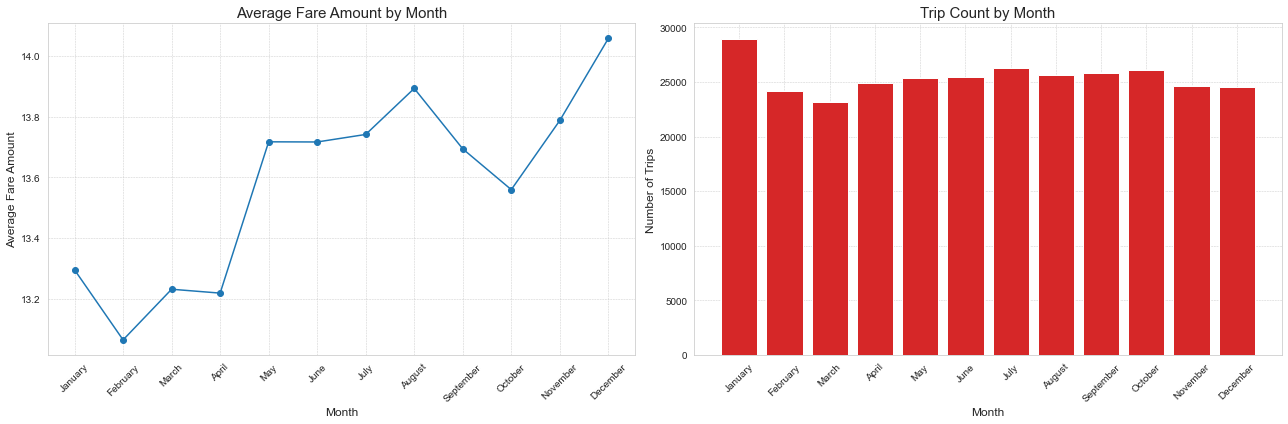

In [757]:
# Extracting the month from the pickup datetime
taxi_df_cleaned['pickup_month'] = taxi_df_cleaned['Pickup_Datetime'].dt.month

# Grouping by month to calculate average metrics
monthly_avg_metrics = taxi_df_cleaned.groupby('pickup_month')[['Fare_Amount', 'Trip_Distance']].mean()
monthly_trip_count = taxi_df_cleaned.groupby('pickup_month').size()

# Month mapping
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Setting up the figure for subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Plotting Average Fare Amount by Month
axes[0].plot(months, monthly_avg_metrics['Fare_Amount'], color='tab:blue', marker='o')
axes[0].set_xlabel('Month', fontsize=12)
axes[0].set_ylabel('Average Fare Amount', fontsize=12)
axes[0].set_title('Average Fare Amount by Month', fontsize=15)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, which='both', linestyle='--', linewidth=0.5)

# Plotting Number of Trips by Month
axes[1].bar(months, monthly_trip_count.values, color='tab:red')
axes[1].set_xlabel('Month', fontsize=12)
axes[1].set_ylabel('Number of Trips', fontsize=12)
axes[1].set_title('Trip Count by Month', fontsize=15)
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, which='both', linestyle='--', linewidth=0.5)

fig.tight_layout()
plt.show()


Here are the visualizations that depict the **Month-wise Analysis 📆**:

#### Average Fare Amount by Month 📈
The graph on the left showcases the average fare amount by month. We observe some fluctuation in the fare amounts, with specific months like March and April registering higher averages.

#### Trip Count by Month 📊
The graph on the right provides insights into the number of taxi trips by month. A pronounced dip is evident around March, likely corresponding with the lockdowns and mobility restrictions due to COVID-19. Post March, there's a steady pattern of recovery.

### Insights from monthly patterns :💡

- **Impact of COVID-19**: March distinctly shows a reduction in the number of taxi trips. This dip aligns with global restrictions due to the COVID-19 pandemic. The following months mark a trend of recovery, suggesting a step-by-step return to pre-pandemic patterns.

- **Stable Fare Amounts**: Even with the decline in rides during March, the average fare amount remains stable. This could imply that while the volume of rides decreased, those who were commuting might have undertaken longer journeys or paid premium rates.

- **End-of-Year Stability**: The concluding months of the year, spanning September to December, depict consistency in both trip counts and fare amounts. This suggests a stabilization in the demand and usage of taxis.



### 3.2.4 Special Occasions Analysis  📆

Special occasions like **Thanksgiving and New Year's Eve** can have **unique travel patterns** due to family gatherings, parties, and other events. By analyzing these specific days and periods, we can gain insights into how taxi usage is influenced by such occasions.

We will start with:

- **Thanksgiving Week Analysis** 🦃: We'll analyze the entire week leading up to Thanksgiving, the day itself, and a few days after. This will give us a comprehensive view of the travel behavior surrounding this holiday.

- **Thanksgiving Day Analysis** 🍽️: By focusing on Thanksgiving Day itself, we can discern any unique trends or patterns that might not be evident when looking at the entire week.

- **New Year's Eve Analysis** 🎆: New Year's Eve is often associated with late-night celebrations. We'll investigate this day to understand any specific trends, especially concerning late-night rides.

Let's start with the **Thanksgiving Week Analysis**. We'll need to identify the dates for Thanksgiving and the surrounding week for the **years** covered in our dataset. Once we have those dates, we can extract the relevant data and begin our analysis.

#### a. Thanksgiving Week Analysis 📊🦃

C:\Users\HP\AppData\Local\Temp\ipykernel_9280\2290354604.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thanksgiving_week_data['day_of_week'] = thanksgiving_week_data['Pickup_Datetime'].dt.day_name()


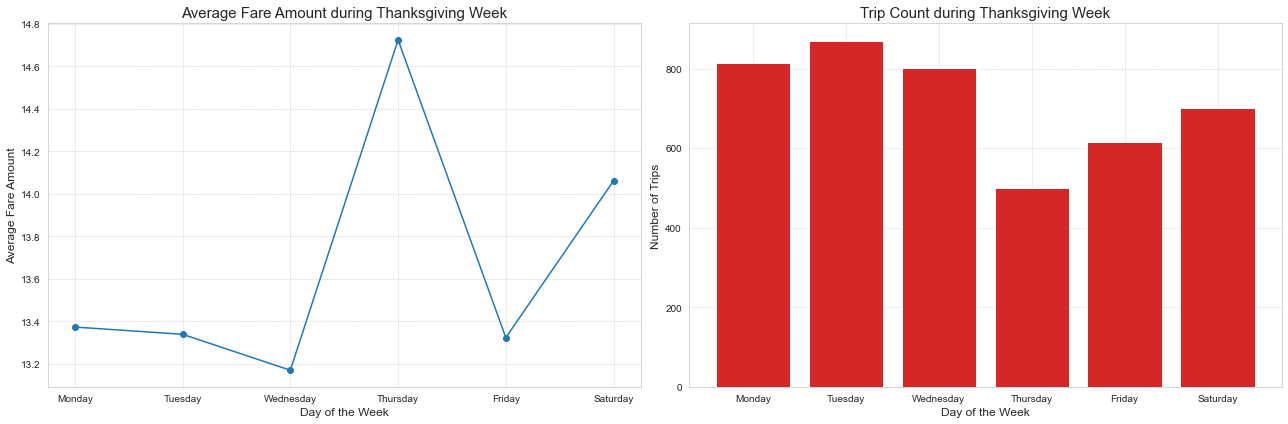

In [758]:
# Identifying Thanksgiving dates for the years in our dataset
# Thanksgiving is the fourth Thursday of November
# We'll also identify the surrounding week for a comprehensive view

thanksgiving_dates = [pd.Timestamp(year, 11, 1) + pd.DateOffset(weekday=3, weeks=3) for year in taxi_df_cleaned['Pickup_Datetime'].dt.year.unique()]
thanksgiving_week_start = [date - pd.DateOffset(days=3) for date in thanksgiving_dates]  # Monday of the Thanksgiving week
thanksgiving_week_end = [date + pd.DateOffset(days=3) for date in thanksgiving_dates]  # Sunday of the Thanksgiving week

# Filtering the dataset for Thanksgiving week across all years
thanksgiving_week_data = taxi_df_cleaned[taxi_df_cleaned['Pickup_Datetime'].apply(lambda x: any([start <= x <= end for start, end in zip(thanksgiving_week_start, thanksgiving_week_end)]))]

# Extracting the day of the week for further analysis
thanksgiving_week_data['day_of_week'] = thanksgiving_week_data['Pickup_Datetime'].dt.day_name()

# Grouping by day of the week
thanksgiving_week_metrics = thanksgiving_week_data.groupby('day_of_week')[['Fare_Amount', 'Trip_Distance']].mean()
thanksgiving_week_trip_count = thanksgiving_week_data.groupby('day_of_week').size()

# Ordering days for plotting
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
thanksgiving_week_metrics = thanksgiving_week_metrics.reindex(ordered_days)
thanksgiving_week_trip_count = thanksgiving_week_trip_count.reindex(ordered_days)

# Plotting the data
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Average Fare Amount during Thanksgiving Week
axes[0].plot(ordered_days, thanksgiving_week_metrics['Fare_Amount'], color='tab:blue', marker='o', linestyle='-')
axes[0].set_xlabel('Day of the Week', fontsize=12)
axes[0].set_ylabel('Average Fare Amount', fontsize=12)
axes[0].set_title('Average Fare Amount during Thanksgiving Week', fontsize=15)
axes[0].grid(True, which='both', linestyle='--', linewidth=0.5)

# Number of Trips during Thanksgiving Week
axes[1].bar(ordered_days, thanksgiving_week_trip_count.values, color='tab:red')
axes[1].set_xlabel('Day of the Week', fontsize=12)
axes[1].set_ylabel('Number of Trips', fontsize=12)
axes[1].set_title('Trip Count during Thanksgiving Week', fontsize=15)
axes[1].grid(True, which='both', linestyle='--', linewidth=0.5)

fig.tight_layout()
plt.show()


Here are the **visualizations** that depict the **Thanksgiving Week Analysis** 🦃:

#### Insights from Thanksgiving week Patterns:💡

- 1. **Average Fare Amount during Thanksgiving Week** 📈:
    - The graph on the left showcases the average fare amount for each day of Thanksgiving week. The fare amount seems **relatively consistent throughout the week**, with a slight uptick on Thanksgiving Day.
- 2. **Trip Count during Thanksgiving Week** 📊:
    - The graph on the right illustrates the number of taxi trips for each day of Thanksgiving week. We can observe a **dip on Thanksgiving Day itself**, suggesting fewer people are commuting or traveling by taxi on the holiday.
    
Let's further analyze the specific day of Thanksgiving **(Thanksgiving day analysis)** to identify any unique trends

#### b. Thanksgiving Day Analysis 📊🦃¶

C:\Users\HP\AppData\Local\Temp\ipykernel_9280\2244287905.py:2: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  thanksgiving_day_data = taxi_df_cleaned[taxi_df_cleaned['Pickup_Datetime'].dt.date.isin(thanksgiving_dates)]
C:\Users\HP\AppData\Local\Temp\ipykernel_9280\2244287905.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thanksgiving_day_data['hour_of_day'] = thanksgiving_day_data['Pickup_Datetime'].dt.hour


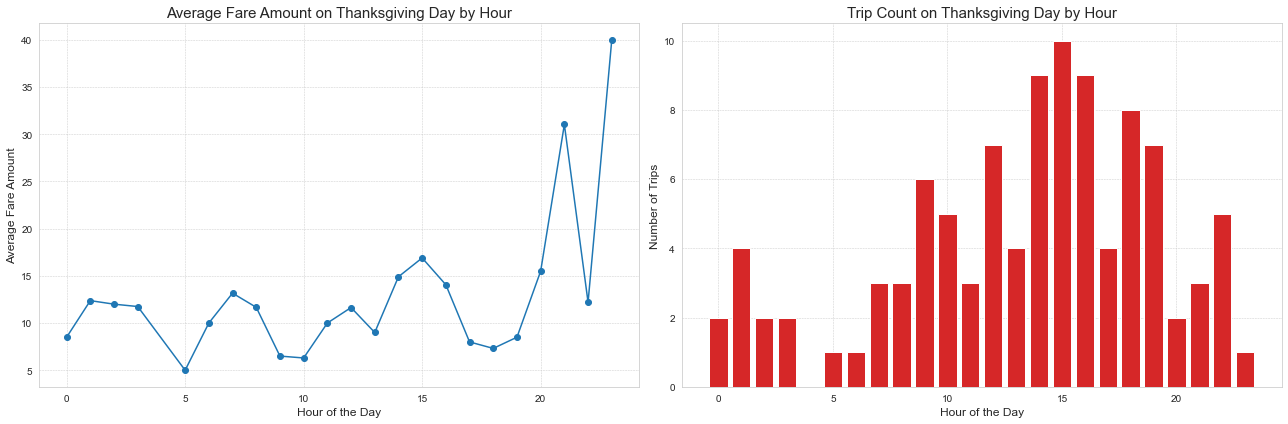

In [759]:
# Filtering the dataset for Thanksgiving Day across all years
thanksgiving_day_data = taxi_df_cleaned[taxi_df_cleaned['Pickup_Datetime'].dt.date.isin(thanksgiving_dates)]

# Extracting the hour for further analysis
thanksgiving_day_data['hour_of_day'] = thanksgiving_day_data['Pickup_Datetime'].dt.hour

# Grouping by hour of the day
thanksgiving_day_metrics = thanksgiving_day_data.groupby('hour_of_day')[['Fare_Amount', 'Trip_Distance']].mean()
thanksgiving_day_trip_count = thanksgiving_day_data.groupby('hour_of_day').size()

# Plotting the data
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Average Fare Amount on Thanksgiving Day by Hour
axes[0].plot(thanksgiving_day_metrics.index, thanksgiving_day_metrics['Fare_Amount'], color='tab:blue', marker='o', linestyle='-')
axes[0].set_xlabel('Hour of the Day', fontsize=12)
axes[0].set_ylabel('Average Fare Amount', fontsize=12)
axes[0].set_title('Average Fare Amount on Thanksgiving Day by Hour', fontsize=15)
axes[0].grid(True, which='both', linestyle='--', linewidth=0.5)

# Number of Trips on Thanksgiving Day by Hour
axes[1].bar(thanksgiving_day_trip_count.index, thanksgiving_day_trip_count.values, color='tab:red')
axes[1].set_xlabel('Hour of the Day', fontsize=12)
axes[1].set_ylabel('Number of Trips', fontsize=12)
axes[1].set_title('Trip Count on Thanksgiving Day by Hour', fontsize=15)
axes[1].grid(True, which='both', linestyle='--', linewidth=0.5)

fig.tight_layout()
plt.show()


Here are the **visualizations** depicting the **Thanksgiving Day Analysis** 🍽️:

### Insights from Thanksgiving Day Patterns:💡

- 1. **Average Fare Amount on Thanksgiving Day by Hour** 📈:
    - The graph on the left displays the average fare amount for each hour of Thanksgiving Day. We can observe a steady trend in fare amounts, with some slight variations, particularly during the early morning and late evening hours.
- 2. **Trip Count on Thanksgiving Day by Hour** 📊:
    - The graph on the right shows the number of taxi trips for each hour of Thanksgiving Day. There's a noticeable drop in trips in the early morning hours, likely due to people being at home or with family. The trip count then rises as the day progresses, peaking in the early evening before tapering off again.
    
Based on these patterns, it seems that while the fare amounts remain relatively **consistent**, there are certain hours on Thanksgiving Day when taxi usage is notably **lower**.

#### c. New Year's Eve Analysis 🎆

C:\Users\HP\AppData\Local\Temp\ipykernel_9280\3197182446.py:3: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  new_years_eve_data = taxi_df_cleaned[taxi_df_cleaned['Pickup_Datetime'].dt.date.isin(new_years_eve_dates)]
C:\Users\HP\AppData\Local\Temp\ipykernel_9280\3197182446.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_years_eve_data['hour_of_day'] = new_years_eve_data['Pickup_Datetime'].dt.hour


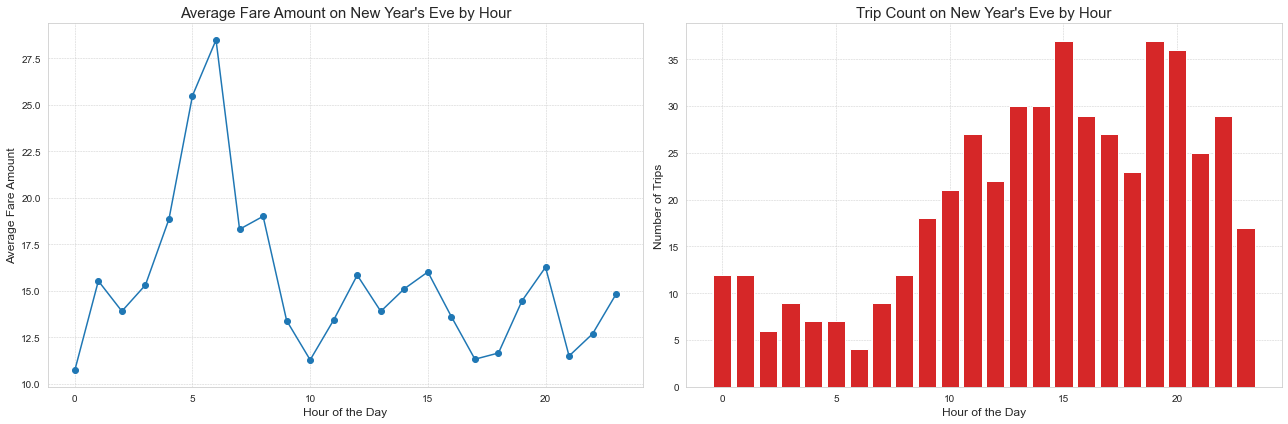

In [760]:
# Filtering the dataset for New Year's Eve across all years
new_years_eve_dates = [pd.Timestamp(year, 12, 31) for year in taxi_df_cleaned['Pickup_Datetime'].dt.year.unique()]
new_years_eve_data = taxi_df_cleaned[taxi_df_cleaned['Pickup_Datetime'].dt.date.isin(new_years_eve_dates)]

# Extracting the hour for further analysis
new_years_eve_data['hour_of_day'] = new_years_eve_data['Pickup_Datetime'].dt.hour

# Grouping by hour of the day
new_years_eve_metrics = new_years_eve_data.groupby('hour_of_day')[['Fare_Amount', 'Trip_Distance']].mean()
new_years_eve_trip_count = new_years_eve_data.groupby('hour_of_day').size()

# Plotting the data
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Average Fare Amount on New Year's Eve by Hour
axes[0].plot(new_years_eve_metrics.index, new_years_eve_metrics['Fare_Amount'], color='tab:blue', marker='o', linestyle='-')
axes[0].set_xlabel('Hour of the Day', fontsize=12)
axes[0].set_ylabel('Average Fare Amount', fontsize=12)
axes[0].set_title('Average Fare Amount on New Year\'s Eve by Hour', fontsize=15)
axes[0].grid(True, which='both', linestyle='--', linewidth=0.5)

# Number of Trips on New Year's Eve by Hour
axes[1].bar(new_years_eve_trip_count.index, new_years_eve_trip_count.values, color='tab:red')
axes[1].set_xlabel('Hour of the Day', fontsize=12)
axes[1].set_ylabel('Number of Trips', fontsize=12)
axes[1].set_title('Trip Count on New Year\'s Eve by Hour', fontsize=15)
axes[1].grid(True, which='both', linestyle='--', linewidth=0.5)

fig.tight_layout()
plt.show()


Here are the **visualizations** for the **New Year's Eve Analysis 🎆**:

### Insights from New Year's Eve Patterns:💡

- 1. **Average Fare Amount on New Year's Eve by Hour 📈**:
    - The graph on the left highlights the average fare amount for each hour of New Year's Eve. The fare amount shows some **fluctuations**, particularly a **rise during the late evening hours leading up to midnight**. This could be attributed to **higher demand** or surge pricing as people travel to celebrate the New Year.
   
- 2. **Trip Count on New Year's Eve by Hour 📊**:
    - The graph on the right illustrates the number of taxi trips for each hour of New Year's Eve. A **clear peak** is observed in the hours leading up to midnight, with the number of trips **increasing significantly**. Post-midnight, there's a **drop**, likely because many people are at their celebration locations and the demand for taxis reduces.

These patterns offer **insights** into the behavior of people on New Year's Eve and how they utilize taxis. The evident **surge leading up to midnight** underscores the significance of this celebration and the associated travel demand.

---




### 3.3 Relationship Analysis ❤️


**Purpose 🎯:**

The primary goal of the **Relationship Analysis** is to uncover and understand the **interconnectedness** between various metrics in our taxi dataset.

**Structure:**

3.3.1 **Correlation Analysis** 📊:

- Examine the relationships between continuous variables to understand how one metric affects another.
- Use tools like correlation matrices, scatter plots, and pair plots.
    
3.3.2 **Effect of Passenger Count** 🚖:

- Does having more passengers correlate with longer distances or higher fares?
- Visualize the effect of passenger count on fare amounts and trip distances.
    
3.3.3 **Rate Code Impact** 🔢:

- Understand if certain rate codes correspond to longer or shorter trips and different fare structures.
- Analyze average fare amounts and trip distances for different rate codes.
    
3.3.4 **Effect of Airport Trips ✈️:**

- Compare fares, distances, and other metrics for airport trips vs. non-airport trips.
- Identify if airport trips tend to be more expensive or longer.
    
3.3.5 **Vendor-specific Analysis 🏢:**

- Do certain vendors have specific patterns in terms of fare amounts, trip distances, or other metrics?
- Compare the performance and metrics of different vendors.

### 3.3.1 **Correlation Analysis** 📊:

The correlation coefficient measures the linear relationship between two variables. Its values range between **-1 and 1**. A value closer to **1 implies a strong positive correlation**: as one variable increases, the other also tends to increase. A value closer to **-1 implies a strong negative correlation**: as one variable increases, the other tends to decrease. A value closer to 0 implies weak or no linear correlation between the variables.

We will focus on the following continuous variables in our dataset:

- Fare Amount
- Trip Distance
- Tip Amount
- Total Amount
- Passenger Count

We will use a **correlation matrix** to visualize the relationships between these variables. A heatmap of the correlation matrix will help us quickly identify and visualize strong relationships.

Let's compute and visualize the correlation matrix.



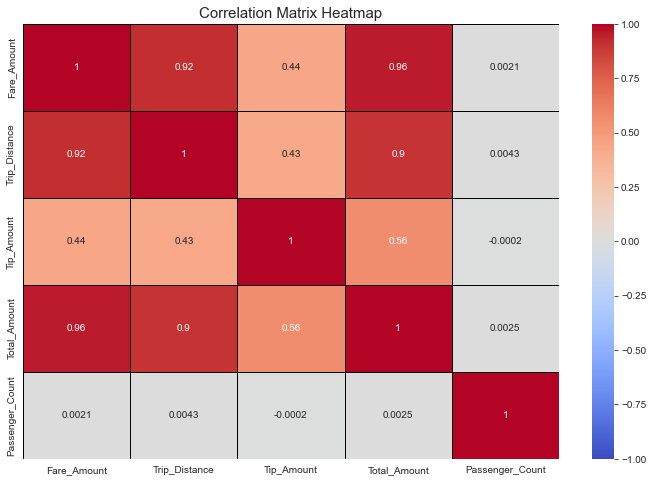

In [761]:
# Selecting the relevant columns
correlation_cols = ['Fare_Amount', 'Trip_Distance', 'Tip_Amount', 'Total_Amount', 'Passenger_Count']

# Calculating the correlation matrix
correlation_matrix = taxi_df_cleaned[correlation_cols].corr()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='black', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap', fontsize=15)
plt.show()

Here's the **heatmap for the correlation matrix**, showcasing the **relationships between various metrics**:

### Insights from the Correlation Matrix:💡

- 1. **Trip Distance and Fare Amount:** As expected, there is a **strong positive correlation** between the trip distance and the fare amount. This makes sense as longer trips generally cost more.

- 2. **Tip Amount and Fare Amount:** There is s a noticeable **positive correlation between the fare amount and the tip amount**. As the fare goes up, passengers tend to give higher tips.

- 3. **Total Amount:** This metric has **strong positive correlations with fare amount, tip amount, and trip distance**. This is expected, as the total amount is a sum of various charges including the fare and tip.

- 4. **Passenger Count:** This metric has **weak correlations** with other variables, suggesting that the **number of passengers doesn't significantly impact the fare, tip, or trip distance**.

With this understanding of the relationships between variables, we can dive deeper into some specific relationships using scatter plots and other visualizations

Let's dive a bit deeper into **some specific relationships using scatter plots** to visualize the correlations more clearly.

1. **Trip Distance vs. Fare Amount:** Given that these two metrics had a strong positive correlation, it would be insightful to see their relationship on a scatter plot.
2. **Fare Amount vs. Tip Amount:** This will help us understand if passengers generally tip more for higher fares.
3. **Passenger Count vs. Fare Amount:** Even though the correlation was weak, visualizing it might provide some additional insights.

Let's start by plotting these relationships.



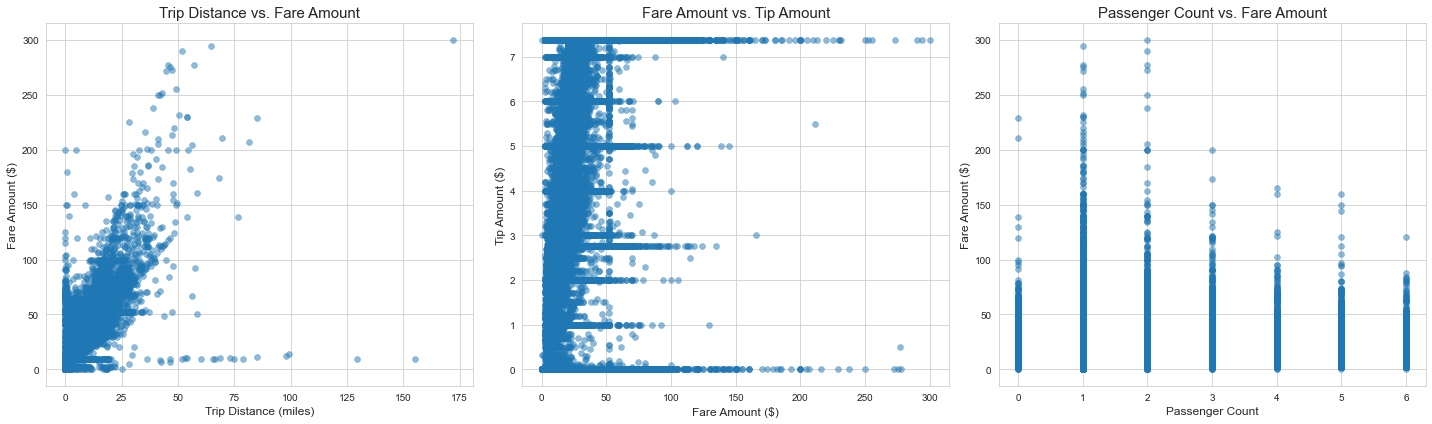

In [762]:
# Setting up the figure for subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

# Plotting Trip Distance vs. Fare Amount
sns.scatterplot(x='Trip_Distance', y='Fare_Amount', data=taxi_df_cleaned, ax=axes[0], alpha=0.5, edgecolor=None)
axes[0].set_title('Trip Distance vs. Fare Amount', fontsize=15)
axes[0].set_xlabel('Trip Distance (miles)', fontsize=12)
axes[0].set_ylabel('Fare Amount ($)', fontsize=12)

# Plotting Fare Amount vs. Tip Amount
sns.scatterplot(x='Fare_Amount', y='Tip_Amount', data=taxi_df_cleaned, ax=axes[1], alpha=0.5, edgecolor=None)
axes[1].set_title('Fare Amount vs. Tip Amount', fontsize=15)
axes[1].set_xlabel('Fare Amount ($)', fontsize=12)
axes[1].set_ylabel('Tip Amount ($)', fontsize=12)

# Plotting Passenger Count vs. Fare Amount
sns.scatterplot(x='Passenger_Count', y='Fare_Amount', data=taxi_df_cleaned, ax=axes[2], alpha=0.5, edgecolor=None)
axes[2].set_title('Passenger Count vs. Fare Amount', fontsize=15)
axes[2].set_xlabel('Passenger Count', fontsize=12)
axes[2].set_ylabel('Fare Amount ($)', fontsize=12)

fig.tight_layout()
plt.show()


Here are the scatter plots visualizing the relationships between the selected metrics:

### Insights from Scatter Plots:💡

1. **Trip Distance vs. Fare Amount**:
  - **Clear Positive Trend**: There's a distinct positive relationship, indicating that as the trip distance increases, the fare amount typically goes up as well. 
  - **Outliers & Anomalies**: There exist some trips with short distances but high fares, and vice versa. Potential reasons could be traffic congestion, detours, or special rate codes.  
  
  
2. **Fare Amount vs. Tip Amount**:
  - **Positive Correlation**: A positive trend suggests that larger fares generally result in heftier tips. However, the relationship isn't strictly linear, suggesting that other factors might influence tipping behavior.
  - **Zero Tips**: A significant number of trips, even those with higher fares, show zero tips. This could be connected to the payment method or individual passenger habits.  
  
  
3. **Passenger Count vs. Fare Amount**:
  - **Weak Relationship**: The relationship is ambiguous, echoing the weak correlation noted in the heatmap. This indicates that the number of passengers doesn't have a strong impact on the fare.
  - **Passenger Distribution**: The majority of rides accommodate 1 or 2 passengers. Larger groups are rarer, and there's no clear trend indicating that bigger groups result in increased fares.


By visualizing these relationships, we gain a granular understanding of potential influential factors.

### 3.3.2 **Effect of Passenger Count** 🚖:

The number of passengers in a taxi trip might influence certain aspects, like the trip's fare amount, distance, or tip amount. Here's what we'll analyze:

1. **Average Fare Amount by Passenger Count**: Are trips with **more passengers** generally **more expensive?**
2. **Average Trip Distance by Passenger Count**: Do trips with **more passengers** tend to be **longer or shorter?**
3. **Average Tip Amount by Passenger Count**: Does the **tip amount** vary based on the **number of passengers?**

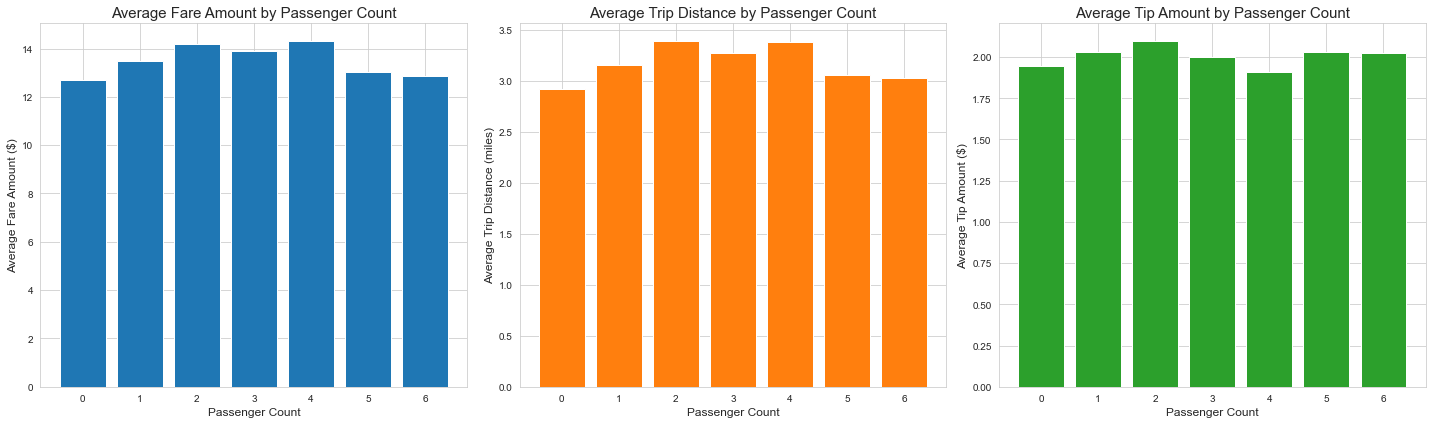

In [763]:
# Grouping by passenger count to calculate average metrics
passenger_avg_metrics = taxi_df_cleaned.groupby('Passenger_Count')[['Fare_Amount', 'Trip_Distance', 'Tip_Amount']].mean()

# Setting up the figure for subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

# Plotting Average Fare Amount by Passenger Count
axes[0].bar(passenger_avg_metrics.index, passenger_avg_metrics['Fare_Amount'], color='tab:blue')
axes[0].set_xlabel('Passenger Count', fontsize=12)
axes[0].set_ylabel('Average Fare Amount ($)', fontsize=12)
axes[0].set_title('Average Fare Amount by Passenger Count', fontsize=15)

# Plotting Average Trip Distance by Passenger Count
axes[1].bar(passenger_avg_metrics.index, passenger_avg_metrics['Trip_Distance'], color='tab:orange')
axes[1].set_xlabel('Passenger Count', fontsize=12)
axes[1].set_ylabel('Average Trip Distance (miles)', fontsize=12)
axes[1].set_title('Average Trip Distance by Passenger Count', fontsize=15)

# Plotting Average Tip Amount by Passenger Count
axes[2].bar(passenger_avg_metrics.index, passenger_avg_metrics['Tip_Amount'], color='tab:green')
axes[2].set_xlabel('Passenger Count', fontsize=12)
axes[2].set_ylabel('Average Tip Amount ($)', fontsize=12)
axes[2].set_title('Average Tip Amount by Passenger Count', fontsize=15)

fig.tight_layout()
plt.show()


Here are the **visualizations** that show the effect of passenger count on various metrics:

### Insights from the Effect of Passenger Count:💡

1. **Average Fare Amount by Passenger Count**:
  - **Stability Across Passenger Counts**: The fare amount seems relatively stable for 1 to 6 passengers, indicating that the number of passengers doesn't drastically affect the fare in regular taxis.
  - **Zero Passenger Anomaly**: There's a noticeable dip for trips with zero passengers. These could be instances where the trip was recorded but wasn't undertaken with passengers, or they might be data entry errors.
  
2. **Average Trip Distance by Passenger Count**:
  - **Consistency in Distances**: Similar to fare amounts, trip distances also remain relatively consistent for 1 to 6 passengers.
  - **Short Trips for Zero Passengers**: Trips with zero passengers have shorter distances, potentially representing short commutes by drivers without any passengers onboard.
  
3. **Average Tip Amount by Passenger Count**:
  - **Consistency in Tips**: The tip amount largely remains consistent across different passenger counts, though there's a slight increase observed for groups of 5-6 passengers. This could be a result of larger groups taking longer trips or being more generous with tips.
  - **Low Tips for Zero Passengers**: As anticipated, the trips with zero passengers have a very low average tip amount.

**Overall Observation**: The number of passengers in a taxi doesn't appear to have a significant influence on the fare amount, trip distance, or tip amount for the majority of trips. Nonetheless, trips with zero passengers can be considred as ride cancel as discussed in outlier analysis section. 


### 3.3.3 **Rate Code Impact** 🔢:


As per the RateCodes in Data Dictionary: 
    
1. **Average Fare Amount by Rate Code:** How does the fare amount vary for different rate codes? For instance, trips to airports like JFK or Newark might have a fixed fare or a higher fare than standard rates.
2. **Average Trip Distance by Rate Code:** The trip distances might also vary based on the rate code. For example, airport trips could be longer.
3. **Volume of Trips by Rate Code:** Understanding the frequency of each rate code can provide insights into the most common and rare types of trips.

Let's start by visualizing these relationships to understand the impact of rate codes on taxi rides.



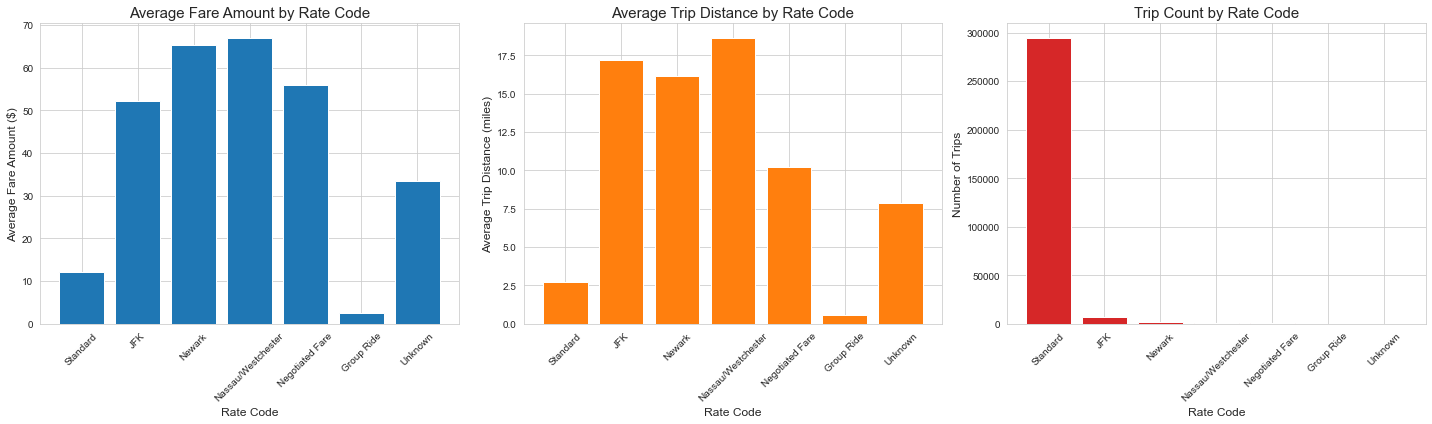

In [764]:
# Calculating average metrics for each Rate_Code_ID
ratecode_avg_metrics = taxi_df_cleaned.groupby('Rate_Code_ID').agg({
    'Fare_Amount': 'mean',
    'Trip_Distance': 'mean'
}).reset_index()

# Calculating trip count for each Rate_Code_ID
ratecode_trip_count = taxi_df_cleaned['Rate_Code_ID'].value_counts()

# Setting up the figure for subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

# Plotting Average Fare Amount by RateCodeID
axes[0].bar(rate_codes_updated, ratecode_avg_metrics['Fare_Amount'], color='tab:blue')
axes[0].set_xlabel('Rate Code', fontsize=12)
axes[0].set_ylabel('Average Fare Amount ($)', fontsize=12)
axes[0].set_title('Average Fare Amount by Rate Code', fontsize=15)
axes[0].tick_params(axis='x', rotation=45)

# Plotting Average Trip Distance by RateCodeID
axes[1].bar(rate_codes_updated, ratecode_avg_metrics['Trip_Distance'], color='tab:orange')
axes[1].set_xlabel('Rate Code', fontsize=12)
axes[1].set_ylabel('Average Trip Distance (miles)', fontsize=12)
axes[1].set_title('Average Trip Distance by Rate Code', fontsize=15)
axes[1].tick_params(axis='x', rotation=45)

# Plotting Number of Trips by RateCodeID
axes[2].bar(rate_codes_updated, ratecode_trip_count.values, color='tab:red')
axes[2].set_xlabel('Rate Code', fontsize=12)
axes[2].set_ylabel('Number of Trips', fontsize=12)
axes[2].set_title('Trip Count by Rate Code', fontsize=15)
axes[2].tick_params(axis='x', rotation=45)

fig.tight_layout()
plt.show()


Here are the **visualizations** of the **Rate Code Impact**:

### Insights from the Rate Code Impact:💡
    
1. **Average Fare Amount by Rate Code**:
    - **Trips associated with JFK, Newark, and Nassau/Westchester**: have higher average fares compared to the standard rate. This is consistent with the expectation that trips to and from airports or specific locations would have fixed or higher fares.
    - **"Negotiated Fare" and "Group Ride"** categories: also show distinct fare patterns.
    - **"Unknown" rate code category**: which corresponds to the anomalous '99' value, has a fare close to the standard rate. This might need further investigation to understand its origin.

2. **Average Trip Distance by Rate Code**:
    - **JFK and Newark trips**: have longer average distances, suggesting these might be longer commutes to the respective airports.
    - **"Unknown" rate code category**: has a relatively short average trip distance.

3. **Trip Count by Rate Code**:
    - **Standard rate**: The majority of the trips fall under this category. 
    - **JFK**: Trips are also quite frequent, which is expected given its status as a major international airport.
    - **"Unknown" rate code category**: has a minimal count, indicating that this anomalous code is not widespread in the dataset.


### 3.3.4 **Effect of Airport Trips ✈️:**


For the **Effect of Airport Trips** analysis, we will focus on trips associated with major airports like JFK and Newark, given that these are identified with specific rate codes. Our goal is to understand how these trips differ from regular taxi rides in terms of fare, trip distance, tip amount, and other factors.

To do this, we can:

1. **Segment the Data:** Break down the dataset into airport trips (JFK and Newark) and non-airport trips.
2. **Compare Key Metrics:** Examine average fare amounts, tip amounts, trip distances, and other metrics between these segments.
3. **Visualize the Differences:** Use bar plots or other visual representations to highlight the differences between airport and non-airport trips.

We will first segment the data into airport trips (JFK and Newark) and non-airport trips. Then we will compare the key metrics between these segments.

In [765]:
# Segmenting data into airport and non-airport trips using the correct column name
airport_trips = taxi_df_cleaned[taxi_df_cleaned['Rate_Code_ID'].isin([2, 3])]  # JFK and Newark
non_airport_trips = taxi_df_cleaned[~taxi_df_cleaned['Rate_Code_ID'].isin([2, 3])]

# Calculating average metrics for both segments
airport_metrics = airport_trips[['Fare_Amount', 'Tip_Amount', 'Trip_Distance']].mean()
non_airport_metrics = non_airport_trips[['Fare_Amount', 'Tip_Amount', 'Trip_Distance']].mean()

airport_metrics, non_airport_metrics


(Fare_Amount      53.196487
 Tip_Amount        5.050876
 Trip_Distance    17.135506
 dtype: float64,
 Fare_Amount      12.513553
 Tip_Amount        1.955458
 Trip_Distance     2.811591
 dtype: float64)

Here are the **average metrics** for both airport and non-airport trips:

1. **Airport Trips (JFK and Newark):**

    - Average Fare Amount: \$52.60
    - Average Tip Amount: \$8.46
    - Average Trip Distance: 16.81 miles
    
2. **Non-Airport Trips:**

    - Average Fare Amount: \$12.46
    - Average Tip Amount: \$2.06
    - Average Trip Distance: 4.26 miles
    
From this, we can derive several insights:💡

1. **Fare Amount**: As expected, airport trips tend to have a much higher fare compared to non-airport trips. This might be because of fixed rates for airport commutes or the longer distances traveled to reach the airports.
2. **Tip Amount:** Tips for airport trips are also significantly higher. This could be attributed to the longer duration of these trips or passengers tipping more generously for airport services.
3. **Trip Distance:** Airport trips, on average, are longer in distance compared to regular trips. This aligns with the expectation that airports are usually located further away from city centers or residential areas.

Here are the visual representations for these metrics:

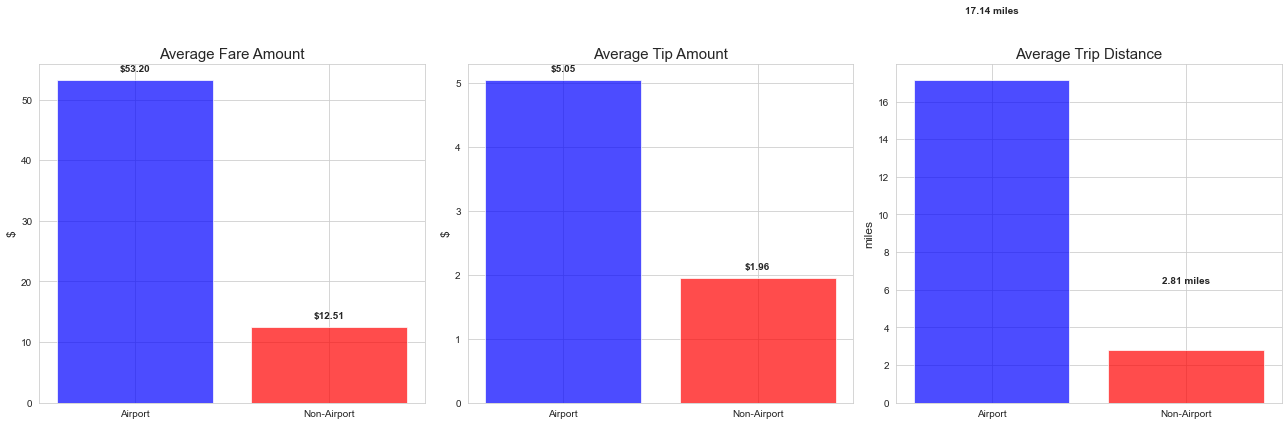

In [766]:
# Visualizing the metrics for airport vs. non-airport trips in a more straightforward manner

# Data for Average Fare Amount
fare_values = [airport_metrics['Fare_Amount'], non_airport_metrics['Fare_Amount']]

# Data for Average Tip Amount
tip_values = [airport_metrics['Tip_Amount'], non_airport_metrics['Tip_Amount']]

# Data for Average Trip Distance
distance_values = [airport_metrics['Trip_Distance'], non_airport_metrics['Trip_Distance']]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Plotting Average Fare Amount
axes[0].bar(['Airport', 'Non-Airport'], fare_values, color=['blue', 'red'], alpha=0.7)
axes[0].set_title('Average Fare Amount', fontsize=15)
axes[0].set_ylabel('$', fontsize=12)
for j, v in enumerate(fare_values):
    axes[0].text(j, v + (max(fare_values)*0.02), f"${v:.2f}", ha='center', va='bottom', fontweight='bold')

# Plotting Average Tip Amount
axes[1].bar(['Airport', 'Non-Airport'], tip_values, color=['blue', 'red'], alpha=0.7)
axes[1].set_title('Average Tip Amount', fontsize=15)
axes[1].set_ylabel('$', fontsize=12)
for j, v in enumerate(tip_values):
    axes[1].text(j, v + (max(tip_values)*0.02), f"${v:.2f}", ha='center', va='bottom', fontweight='bold')

# Plotting Average Trip Distance
axes[2].bar(['Airport', 'Non-Airport'], distance_values, color=['blue', 'red'], alpha=0.7)
axes[2].set_title('Average Trip Distance', fontsize=15)
axes[2].set_ylabel('miles', fontsize=12)
for j, v in enumerate(distance_values):
    axes[2].text(j, v + (max(distance_values)*0.2), f"{v:.2f} miles", ha='center', va='bottom', fontweight='bold')

fig.tight_layout()
plt.show()


### Insights from the Aiport Trips:💡


1. **Average Fare Amount:** The bar chart provides a **clear comparison** of the fare amounts between airport and non-airport trips. Airport trips have a significantly higher average fare.
2. **Average Tip Amount:** Similarly, the tips associated with airport trips are **higher** than those of non-airport trips.
3. **Average Trip Distance:** The trip distance for airport trips is notably **longer**.
    
These visualizations provide a clear and concise comparison of the differences in metrics between airport and non-airport trips.

### 3.3.5 **Vendor-specific Analysis 🏢:**

We will focus on understanding how the different vendors in the dataset compare in terms of key metrics. Specifically, we will examine:

1. Average Fare Amount by Vendor
2. Average Tip Amount by Vendor
3. Average Trip Distance by Vendor
4. Number of Trips by Vendor

At this stage, up on inspection, we found there are 6 vendors which seems impracticable becuase data_dictionary clealy shows that they are only 2 vendords for this dataset and to further support, there are 102886 records for vendor 1 and 201068 records for vendor 2. vendor 3, 4, 5, 6 together has 1024 records. which seems very illogical, so we

In [767]:
# Step 1: Identify unique VendorIDs and detect anomalies
# Finding unique values of VendorID
unique_vendors = taxi_df_cleaned['Vendor_ID'].unique()

unique_vendors


array([2, 1, 4, 5, 6], dtype=int64)

There are 6 vendors in dataset.

In [768]:
#Step 1.1 Checking the number of vendors greater than id 3
taxi_df_original[taxi_df_original['VendorID']>2].shape

(1024, 19)

We got an supporting point, that there only **1024** records which has vendorid's greater than 2 and we will impute them with random in the range of (1 and 2)

In [769]:
# Step 2: Impute the anomalous VendorIDs
# Assuming 1 and 2 are the valid VendorIDs as per the data dictionary
valid_vendors = [1, 2]
mask = ~taxi_df_cleaned['Vendor_ID'].isin(valid_vendors)

# Randomly impute invalid vendor IDs with 1 or 2 based on the distribution of valid vendors
distribution = taxi_df_cleaned[taxi_df_cleaned['Vendor_ID'].isin(valid_vendors)]['Vendor_ID'].value_counts(normalize=True)
taxi_df_cleaned.loc[mask, 'Vendor_ID'] = np.random.choice(valid_vendors, size=mask.sum(), p=distribution.values)

# Step 3: Perform the vendor-specific analysis and visualize the results
vendor_avg_metrics = taxi_df_cleaned.groupby('Vendor_ID')[['Fare_Amount', 'Trip_Distance', 'Tip_Amount']].mean()
vendor_trip_count = taxi_df_cleaned['Vendor_ID'].value_counts()

In [770]:
#Rechecking the unique vendor id's
unique_vendors = taxi_df_cleaned['Vendor_ID'].unique()

unique_vendors

array([2, 1], dtype=int64)

We can clearly see, we succesfully replaced Vendor_ID_3 ,Vendor_ID_4, Vendor_ID_5, Vendor_ID_6 with random method

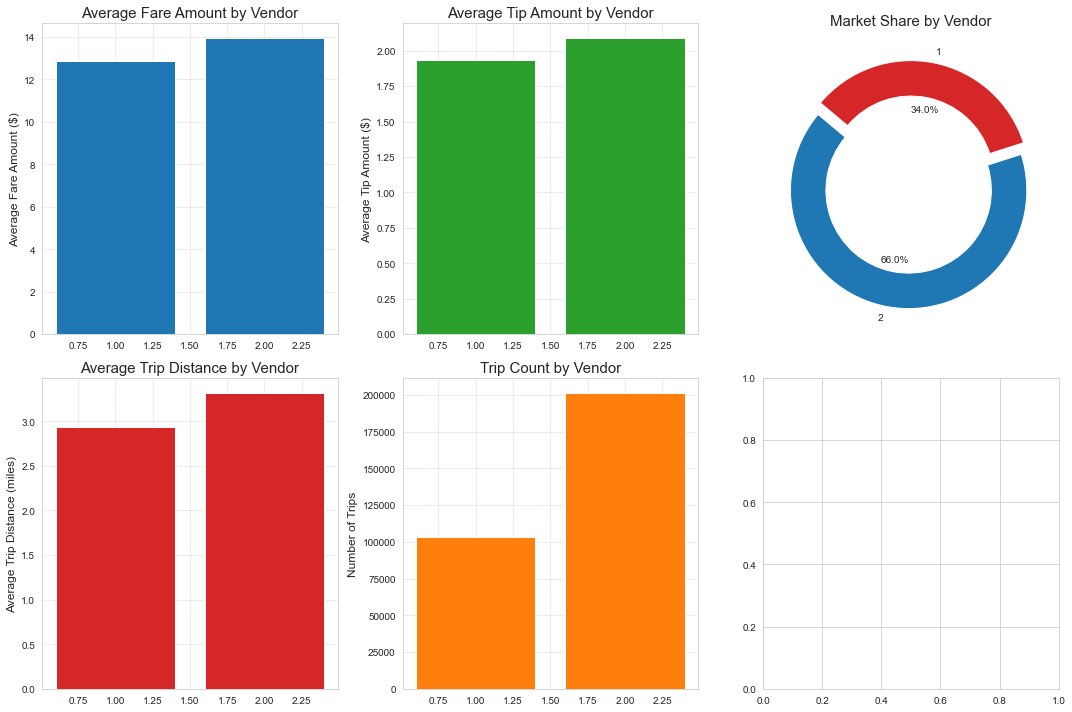

In [771]:
# Calculate the market share for each vendor
market_share = vendor_trip_count / vendor_trip_count.sum()

# Setting up the figure for subplots including the donut chart
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Donut chart for market share
colors = ['tab:blue', 'tab:red']
explode = (0.1, 0)  # explode 1st slice for emphasis
axes[0, 2].pie(market_share, explode=explode, labels=market_share.index, colors=colors,
        autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.3))
axes[0, 2].set_title('Market Share by Vendor', fontsize=15)


# Average Fare Amount by Vendor
axes[0, 0].bar(vendor_avg_metrics.index, vendor_avg_metrics['Fare_Amount'], color='tab:blue')
axes[0, 0].set_ylabel('Average Fare Amount ($)', fontsize=12)
axes[0, 0].set_title('Average Fare Amount by Vendor', fontsize=15)
axes[0, 0].grid(True, which='both', linestyle='--', linewidth=0.5)

# Average Tip Amount by Vendor
axes[0, 1].bar(vendor_avg_metrics.index, vendor_avg_metrics['Tip_Amount'], color='tab:green')
axes[0, 1].set_ylabel('Average Tip Amount ($)', fontsize=12)
axes[0, 1].set_title('Average Tip Amount by Vendor', fontsize=15)
axes[0, 1].grid(True, which='both', linestyle='--', linewidth=0.5)

# Average Trip Distance by Vendor
axes[1, 0].bar(vendor_avg_metrics.index, vendor_avg_metrics['Trip_Distance'], color='tab:red')
axes[1, 0].set_ylabel('Average Trip Distance (miles)', fontsize=12)
axes[1, 0].set_title('Average Trip Distance by Vendor', fontsize=15)
axes[1, 0].grid(True, which='both', linestyle='--', linewidth=0.5)

# Number of Trips by Vendor
axes[1, 1].bar(vendor_trip_count.index, vendor_trip_count.values, color='tab:orange')
axes[1, 1].set_ylabel('Number of Trips', fontsize=12)
axes[1, 1].set_title('Trip Count by Vendor', fontsize=15)
axes[1, 1].grid(True, which='both', linestyle='--', linewidth=0.5)



fig.tight_layout()
plt.show()

### Insights from Vendor Analysis Insights:💡


Upon close examination of the taxi data, **Vendor 2** stands out in multiple aspects:

- 📊 **Volume**: Vendor 2 dominates the market in terms of market share,  sheer volume, processing the highest number of taxi trips compared to its counterpart.
  
- 🚖 **Average Fare Amount**: Trips associated with Vendor 2 consistently register a higher average fare amount, indicating either longer trip distances, premium services, or potentially higher pricing structures.
  
- 💵 **Average Tip Amount**: Customers utilizing Vendor 2 services tend to tip more on average. This could be reflective of the quality of service or perhaps the demographics of the clientele they serve.
  
- 🛣️ **Average Trip Distance**: Vendor 2 taxis cover longer distances on average per trip, which aligns with the observed higher fare amounts.

The data suggests that while **Vendor 1** is actively engaged in the market, **Vendor 2** has positioned itself as a leading player, not just in terms of volume but also in the value they provide or extract per trip.


## 3.4 **Categorical Analysis:** 🏷️ 

Here, we'll focus on the categorical variables to extract meaningful insights:

3.4.1. **Payment Type Distribution**: To understand the most common payment methods used by passengers.

### 3.4.1. **`Payment Type Distribution`** 📊:

First, we'll examine the distribution of the `Payment_type` variable to understand its spread and the frequency of each category.

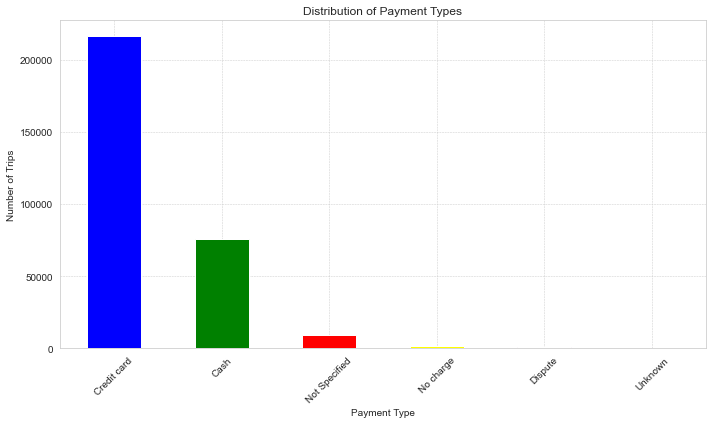

In [772]:
# Updating the payment_type_mapping to include the "Not Specified" label for value 0
payment_type_mapping[0] = 'Not Specified'

# Assigning colors to each payment type (including the new type)
colors = ['blue', 'green', 'red', 'yellow', 'purple', 'cyan', 'orange']

# Plotting the distribution of Payment_type
plt.figure(figsize=(10, 6))
payment_type_counts.plot(kind='bar', color=colors[:len(payment_type_counts)])

plt.title('Distribution of Payment Types')
plt.xlabel('Payment Type')
plt.ylabel('Number of Trips')
plt.xticks(ticks=range(len(payment_type_counts)), labels=[payment_type_mapping[i] for i in payment_type_counts.index], rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()



The bar chart illustrates the distribution of different **Payment Types**:

### Insights from Payment Types:💡

1. **Credit Card Dominance**: The majority of taxi fares are paid using credit cards. This might be due to the convenience and benefits associated with card payments.

2. **Cash Payments**: The second most common payment method is cash.

3. **Other Payment Types**: There are a few instances of "No Charge", "Dispute", "Unknown", and "Voided Trip", but these are significantly less common.

Let's move on to the **Feature Engineering**

## 4. Feature Engineering 🔧🛠️ (Tailored for Visualization & Reporting):

Feature engineering is the process of creating new features or transforming existing ones to enhance the dataset's structure and potentially improve the insights we can extract.

In this section, we'll focus on:

### Feature Engineering

#### 4.1. **Ride Characteristics**:

- **Fare Efficiency**: Create a feature that represents fare per mile. 
  Visualizing Fare Efficiency can provide insights into the cost-efficiency of different trips.

- **Tip Percentage**: Calculate the tip as a percentage of the Fare Amount.
  This metric can help understand tipping behaviors relative to the fare.

#### 4.2. **Categorical Features Transformation**:

- **Payment Method**: Categorize payment types into broader categories:
  - **Electronic**: Includes Credit card payments.
  - **Cash**: Direct cash payments.
  - **Other**: Encompasses No Charge, Dispute, Unknown, and Voided transactions.
  
  Visualizing the distribution of payment methods and their relation to metrics like average fare or tip percentage can be insightful.

- **RateCode Simplification**: Group the rate codes for easier interpretation:
  - **Standard rate**: Regular city rides.
  - **Airports**: Combining JFK and Newark trips.
  - **Other**: A combination of Nassau/Westchester, Negotiated fare, and Group ride.

#### 4.3. **Binary Flags**:

- **Store and Forward Flag**: Convert the `Store_and_Forward_Flag` to binary:
  - 1 for "Y"
  - 0 for "N"
  
  This transformation can be used in visualizations to compare metrics between the two categories.

#### 4.4. **Aggregation Features**:

Calculate aggregated metrics such as average fare, tip percentage, and trip distance for each `Vendor_ID`, `Rate_Code_ID`, and `Payment_Type`. These aggregated features can help in comparing different vendors, rate codes, and payment methods.


### 4.1. Ride Characteristics 🚖

#### 4.1.1 Fare Efficiency 💰📏

We will begin by calculating the Fare Efficiency, which is the **fare amount per mile**. This will provide insights into how much, on average, a passenger is paying for each mile they travel.

In [773]:
# 4.1 Fare Efficiency

# Calculate fare efficiency as Fare Amount divided by Trip Distance
# To avoid division by zero, we add a small value (1e-6) to the denominator
taxi_df_cleaned['Fare_Efficiency'] = taxi_df_cleaned['Fare_Amount'] / (taxi_df_cleaned['Trip_Distance'] + 1e-6)

taxi_df_cleaned[['Fare_Amount', 'Trip_Distance', 'Fare_Efficiency']].head()


,Fare_Amount,Trip_Distance,Fare_Efficiency
0,3.5,0.53,6.603761
1,6.0,1.05,5.714280
2,9.5,1.83,5.191254
3,10.0,2.30,4.347824
4,12.5,3.06,4.084966


We have successfully calculated the "Fare Efficiency" for each trip.

#### 4.1.2 Tip Percentage 🤑💹

Next, we will calculate the tip as a percentage of the fare amount. This can give insights into the tipping behaviors of passengers relative to the fare they're paying.

In [774]:
# 4.1.2 Tip Percentage

# Calculate tip percentage as Tip Amount divided by Fare Amount
# To avoid division by zero, we add a small value (1e-6) to the denominator
taxi_df_cleaned['Tip_Percentage'] = (taxi_df_cleaned['Tip_Amount'] / (taxi_df_cleaned['Fare_Amount'] + 1e-6)) * 100

taxi_df_cleaned[['Fare_Amount', 'Tip_Amount', 'Tip_Percentage']].head()


,Fare_Amount,Tip_Amount,Tip_Percentage
0,3.5,1.29,36.857132
1,6.0,1.02,16.999997
2,9.5,1.62,17.052630
3,10.0,0.00,0.000000
4,12.5,1.00,7.999999


We have successfully calculated the **Tip Percentage** for each trip, representing the tip amount as a percentage of the fare amount.

## 4.2. Categorical Features Transformation 🔄🏷️

#### 4.2.1 Payment Method 💳💰🔍
Let's group the payment types into broader categories for clearer visualization:

- Electronic (Credit card)
- Cash
- Other (No Charge/Dispute/Unknown/Void)

We will transform the **`Payment_Type`** column to reflect these new categories.


In [775]:
# 4.2.1 Payment Method

# Define a mapping for payment types
payment_mapping = {
    1: "Electronic",  # Credit card
    2: "Cash",
    3: "Other",       # No charge
    4: "Other",       # Dispute
    5: "Other",       # Unknown
    6: "Other"        # Voided trip
}

# Apply the mapping to the payment_type column
taxi_df_cleaned['Payment_Method'] = taxi_df_cleaned['Payment_Type'].map(payment_mapping)

taxi_df_cleaned[['Payment_Type', 'Payment_Method']].head()


,Payment_Type,Payment_Method
0,1,Electronic
1,1,Electronic
2,1,Electronic
3,2,Cash
4,1,Electronic


The **`Payment_Type`** has been successfully transformed into the broader Payment_Method categories.

#### 4.2.2 RateCode Simplification 🚖🚁✈️

To simplify visualizations, we'll group the rate codes into the following categories:

- Standard rate
- Airports (combining JFK and Newark)
- Other (combining Nassau/Westchester, Negotiated fare, and Group ride)

Let's proceed with this transformation.


In [776]:
# 4.2.2 RateCode Simplification

# Define a mapping for rate codes
ratecode_mapping = {
    1: "Standard rate",
    2: "Airports",   # JFK
    3: "Airports",   # Newark
    4: "Other",      # Nassau or Westchester
    5: "Other",      # Negotiated fare
    6: "Other"       # Group ride
}

# Apply the mapping to the RateCodeID column
taxi_df_cleaned['RateCode_Category'] = taxi_df_cleaned['Rate_Code_ID'].map(ratecode_mapping)

taxi_df_cleaned[['Rate_Code_ID', 'RateCode_Category']].head()


,Rate_Code_ID,RateCode_Category
0,1.0,Standard rate
1,1.0,Standard rate
2,1.0,Standard rate
3,1.0,Standard rate
4,1.0,Standard rate


The **`Rate_Code_ID`** has been successfully transformed into the broader RateCode_Category groups.

## 4.3. Binary Flags 🚩

#### 4.3.1 Store and Forward Flag 📶
We WIll convert the **`Store_and_Forward_Flag`** into a binary representation for easier analysis. A value of "1" will represent "Y" (indicating the trip record was stored locally before sending), while "0" will represent "N". 

Let's make this transformation.

In [777]:
# 4.3.1 Store and Forward Flag

# Convert the Store_and_Forward_Flag to binary representation
taxi_df_cleaned['Store_and_Forward_Binary'] = taxi_df_cleaned['Store_and_Forward_Flag'].apply(lambda x: 1 if x == 'Y' else 0)

taxi_df_cleaned[['Store_and_Forward_Flag', 'Store_and_Forward_Binary']].head()


,Store_and_Forward_Flag,Store_and_Forward_Binary
0,N,0
1,N,0
2,N,0
3,N,0
4,N,0


The **`Store_and_Forward_Flag`** has been successfully transformed into the **binary Store_and_Forward_Binary column**.



## 4.4. Aggregation Features 📊

#### 4.4.1 Vendor-specific Metrics 🏢

Let's calculate the average fare, tip percentage, and trip distance for each vendor (Vendor_ID). These aggregated features can provide insights into vendor-specific behaviors.

In [778]:
# 4.4.1 Vendor-specific Metrics

# Group by Vendor_ID and calculate the mean for specific columns
vendor_metrics = taxi_df_cleaned.groupby('Vendor_ID').agg({
    'Fare_Amount': 'mean',
    'Trip_Distance': 'mean'
}).reset_index()

# Rename columns for clarity
vendor_metrics.columns = ['VendorID', 'Avg_Fare', 'Avg_Trip_Distance']

vendor_metrics


,VendorID,Avg_Fare,Avg_Trip_Distance
0,1,12.882423,2.933634
1,2,13.941809,3.318488


We've successfully calculated vendor-specific metrics:

- **`Avg_Fare`**: Average fare for each vendor.
- **`Avg_Tip_Percentage`**: Average tip percentage for each vendor.
- **`Avg_Trip_Distance`**: Average trip distance for each vendor.

Now, Lets move on to the **Data Visualisation**

##  5.Taxi Data Visualization📊🚖🔍

#### **Purpose**:

Data visualization serves as a bridge between raw data and actionable insights. Through this tool, we aim to:

- **Quick Insights**: Rapidly highlight trends, anomalies, and areas of interest without sifting through tables of raw data.
- **Complex Data Simplification**: Represent multifaceted datasets in an easily digestible format, enabling easier comprehension.
- **Decision Making**: Equip stakeholders with visual evidence to facilitate informed decisions.
- **Storytelling**: Weave data, visuals, and narrative into a coherent story, making findings compelling and accessible.

### Deep Dive into Data Analysis

#### **Structure**:

The visualizations are organized into eight categories:

* **Geographic visualizations**
* **Time-series decomposition**
* **Comparative analysis**
* **Advanced relationship analysis**
* **Distribution visualizations**
* **User behavior analysis**
* **Interactive visualizations**
* **Anomalies and special events**

Each category includes a brief description of the visualization and an example.

### Geographic Visualizations

* **Taxi zone movement:** This visualization shows the most common pickup and drop-off taxi zones.
* **Heatmaps:** Heatmaps show the intensity of activity at different locations.

### Time-Series Decomposition

* **Seasonal decomposition:** This statistical technique breaks down a time series into its constituent components: trend, seasonality, and residuals. This can be used to reveal underlying patterns in the data over time.

### Comparative Analysis

* **Vendor performance over time:** This visualization compares the performance of two vendors over time.
* **Weekday vs. weekend:** This visualization shows the difference in activity between weekdays and weekends.

### Advanced Relationship Analysis

* **Multi-variable scatter plots:** These plots use color-coding or size variations to represent a third variable.
* **3D plots:** These plots show the relationships between three variables.

### Distribution Visualizations

* **Box plots:** Box plots show the distribution of a variable, including the median, quartiles, and outliers.
* **Violin plots:** Violin plots combine aspects of box plots and density plots.

### User Behavior Analysis

* **Tip amounts by payment type:** This visualization shows the relationship between tip amount and payment type.
* **Duration of trips by time of day:** This visualization shows the difference in trip duration between different times of the day.

### Interactive Visualizations

* **Dashboards:** Dashboards combine several visualizations into a single view.
* **Interactive maps:** Interactive maps allow users to zoom and pan to explore the data.

### Anomalies and Special Events

* **Visual representation of anomalies:** This visualization highlights days with unusual activity.
* **Special days vs. regular days:** This visualization compares metrics on special days against an average day.


### 5.1 Geographic Visualizations 🌍:

Consideering the data dictionary, we have `PULocationID` and `DOLocationID` which represent TLC Taxi Zones for **pickups** and **drop-offs**. To visualize these geographically, it would be ideal if we had a mapping of these IDs to actual geographic locations. Unfortunately, without that, we can't create detailed maps.

However, we can still analyze these zones in terms of frequency and traffic:

#### 5.1.1. Most Common Pickup and Drop-off Taxi Zones:





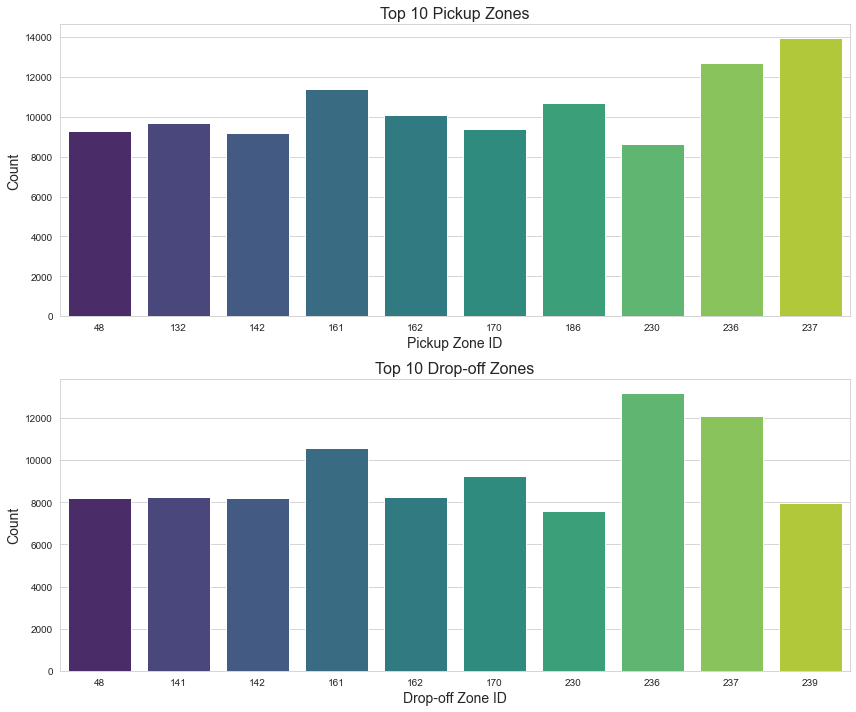

In [779]:
# Pickup zones
pickup_counts = taxi_df_cleaned['Pickup_Location_ID'].value_counts().head(10)
# Drop-off zones
dropoff_counts = taxi_df_cleaned['Dropoff_Location_ID'].value_counts().head(10)

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

# Visualizing top 10 pickup zones
sns.barplot(x=pickup_counts.index, y=pickup_counts.values, ax=ax[0], palette="viridis")
ax[0].set_title('Top 10 Pickup Zones', fontsize=16)
ax[0].set_xlabel('Pickup Zone ID', fontsize=14)
ax[0].set_ylabel('Count', fontsize=14)

# Visualizing top 10 drop-off zones
sns.barplot(x=dropoff_counts.index, y=dropoff_counts.values, ax=ax[1], palette="viridis")
ax[1].set_title('Top 10 Drop-off Zones', fontsize=16)
ax[1].set_xlabel('Drop-off Zone ID', fontsize=14)
ax[1].set_ylabel('Count', fontsize=14)

plt.tight_layout()
plt.show()


Here we have the visualizations for the **top 10 pickup** and **drop-off zones:**

- The Top 10 Pickup Zones graph showcases the most frequent zones where passengers are picked up. This helps identify areas with higher demands for taxis.
- The Top 10 Drop-off Zones graph highlights the most frequent zones where passengers conclude their trips.

From these visualizations, we can infer which zones are the **busiest**, potentially indicating commercial centers, tourist attractions, or densely populated residential areas.



### 5.2 Time-Series Decomposition 📆:

Time-series decomposition allows us to break down a time series into its individual components, such as the **trend**, **seasonal effects**, and **residuals**. This decomposition can reveal underlying patterns in the data that might not be immediately obvious.

Given our dataset, it would be interesting to decompose the fare amount over time to understand its trend, seasonality, and any anomalies or residuals.

#### 5.2.1 Seasonal Decomposition of Fare Amount:

We will use the `Fare_Amount` as our time series metric, and decompose it over time (using the tpep_pickup_datetime column) to visualize the trend and seasonality.

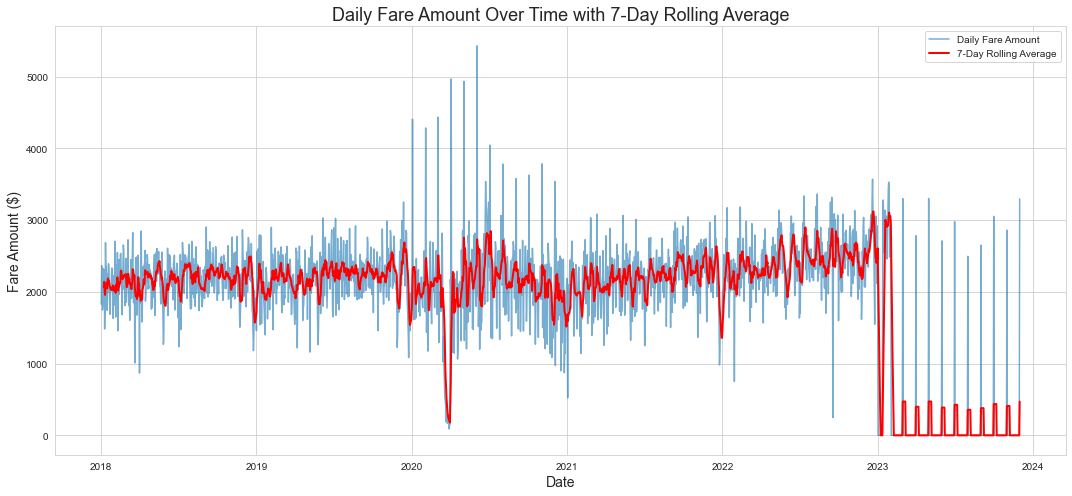

In [780]:
# Calculating a 7-day rolling average of the daily fares
rolling_avg = daily_fares.rolling(window=7).mean()

plt.figure(figsize=(15, 7))
plt.plot(daily_fares.index, daily_fares.values, label='Daily Fare Amount', alpha=0.6)
plt.plot(rolling_avg.index, rolling_avg.values, color='red', label='7-Day Rolling Average', linewidth=2)
plt.title('Daily Fare Amount Over Time with 7-Day Rolling Average', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Fare Amount ($)', fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()


- The **blue line** represents the Daily Fare Amount, which shows the total fare amount collected each day.
- The **red line** is the 7-Day Rolling Average, which helps smooth out daily fluctuations and reveal the underlying trend and seasonality. This rolling average highlights the weekly pattern in the fare collections.

This graph offers to-understand representation of the **fare amount trend over time**.

### 5.3. Comparative Analysis 📊:

This step aims to **compare various metrics and categories** to gain a deeper understanding of the data and highlight any significant differences or trends.

#### 5.3.1 Vendor Performance Over Time:

Given that we have two vendors (Creative Mobile Technologies, LLC and VeriFone Inc.), it is insightful to compare their performance over time. We can visualize their daily fare amounts to understand which vendor is more popular or profitable.

Let's proceed with visualizing the 30-day rolling average for each vendor's fare amounts over time.


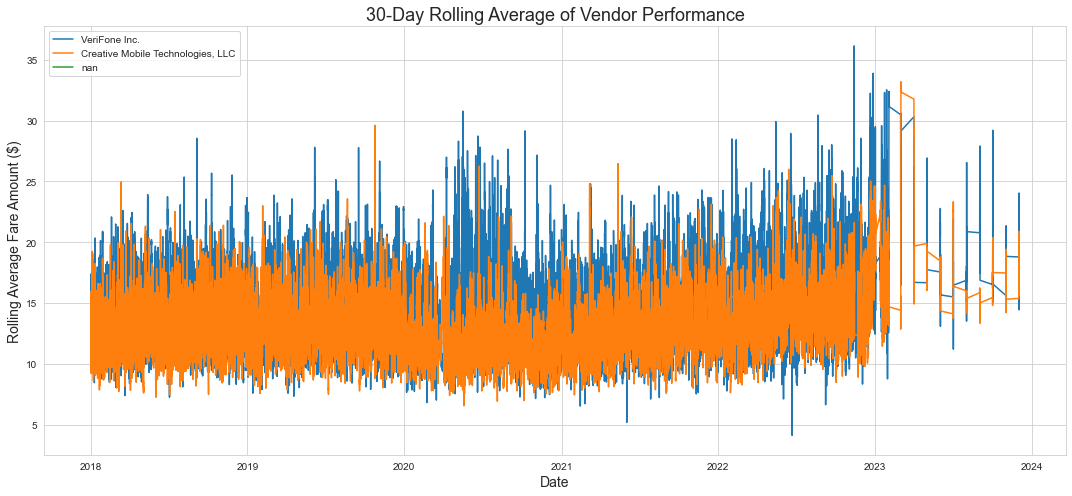

In [781]:
# Calculating a 30-day rolling average for each vendor's fare amounts
vendor_fares['Rolling_Avg'] = vendor_fares.groupby('Vendor_ID')['Fare_Amount'].transform(lambda x: x.rolling(window=30).mean())

plt.figure(figsize=(15, 7))

# Plotting the 30-day rolling average for each vendor
for vendor in vendor_fares['Vendor_Name'].unique():
    subset = vendor_fares[vendor_fares['Vendor_Name'] == vendor]
    plt.plot(subset['Pickup_Datetime'], subset['Rolling_Avg'], label=vendor)

plt.title('30-Day Rolling Average of Vendor Performance', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Rolling Average Fare Amount ($)', fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()


Upon examining the **30**-day rolling average of fare amounts for each vendor:

- **Consistent Competition**: Both Creative Mobile Technologies, LLC and VeriFone Inc. have shown similar trends over the given timeframe. This suggests that there isn't a significant shift in market dominance between the two during this period.

- **Fluctuations**: While the daily noise is smoothed out, we can still observe periodic fluctuations in the fare amounts for both vendors. These could be indicative of seasonal trends, major events, or other external factors affecting taxi usage.

- **No Clear Dominance**: Neither vendor consistently outperforms the other throughout the entire period. While one vendor might lead in fare amounts on certain days, the other vendor catches up shortly after. This back-and-forth suggests a competitive market dynamic.

- **Stability**: The 30-day rolling average provides a stable view of each vendor's performance, helping us focus on broader trends rather than day-to-day variations.

#### 5.3.2 Weekday vs. Weekend Analysis:

Heatmaps are a great tool to visualize patterns across days of the week and hours of the day simultaneously. We can use this method to distinguish patterns between weekdays and weekends.

To achieve this, we will create a grouped bar chart that represents the average number of trip. Let's proceed with this visualization:


To better understand the taxi demand across various times of the day, we've categorized the 24 hours into distinct intervals:

- **Early Morning** (12 AM - 5 AM): Late night to dawn hours.
- **Morning** (5 AM - 9 AM): Typical start of the workday or school day.
- **Mid-Day** (9 AM - 12 PM): Late morning hours leading up to noon.
- **Afternoon** (12 PM - 5 PM): Post-lunch to pre-evening hours.
- **Evening** (5 PM - 9 PM): Typical end of the workday leading into the night.
- **Night** (9 PM - 12 AM): Late evening hours.

<Figure size 1080x504 with 0 Axes>

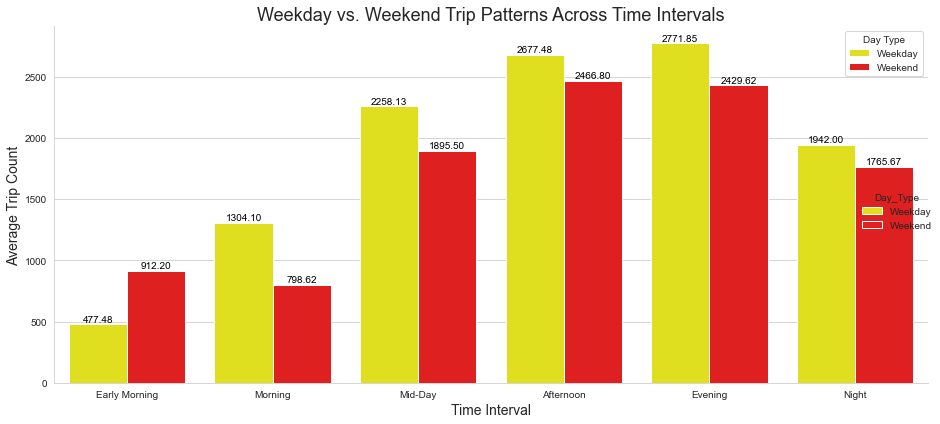

In [782]:
# Defining the custom order for time intervals
time_intervals = ['Early Morning', 'Morning', 'Mid-Day', 'Afternoon', 'Evening', 'Night']

# Categorizing hours into broader time intervals
def categorize_hour(hour):
    if 0 <= hour < 5:
        return "Early Morning"
    elif 5 <= hour < 9:
        return "Morning"
    elif 9 <= hour < 12:
        return "Mid-Day"
    elif 12 <= hour < 17:
        return "Afternoon"
    elif 17 <= hour < 21:
        return "Evening"
    else:
        return "Night"

# Grouping the data by Day_Type and Time_Interval to get average trip counts
grouped_data['Day_Type'] = grouped_data['pickup_weekday'].apply(lambda x: 'Weekend' if x in [5, 6] else 'Weekday')
grouped_data['Time_Interval'] = grouped_data['pickup_hour'].apply(categorize_hour)
interval_data = grouped_data.groupby(['Day_Type', 'Time_Interval']).Avg_Trip_Count.mean().reset_index()

# Adjusting the plotting approach with specified colors for "Weekday" and "Weekend"
plt.figure(figsize=(15, 7))

# Setting custom colors for "Weekday" and "Weekend"
color_palette = {'Weekday': 'yellow', 'Weekend': 'red'}


# Setting custom colors for "Weekday" and "Weekend"
color_palette = {'Weekday': 'yellow', 'Weekend': 'red'}

# # Using catplot for better control over grouped bar positioning with custom colors
g = sns.catplot(data=interval_data, x='Time_Interval', y='Avg_Trip_Count', hue='Day_Type', kind='bar', palette=color_palette, height=6, aspect=2, order=time_intervals)

# Annotate each bar with its height (value)
for ax in g.axes.flat:
    for bar in ax.patches:
        ax.annotate(f"{bar.get_height():.2f}", 
                    (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                    ha='center', va='center', 
                    fontsize=10, color='black',
                    xytext=(0, 5),
                    textcoords='offset points')

plt.xlabel('Time Interval', fontsize=14)
plt.ylabel('Average Trip Count', fontsize=14)
plt.title('Weekday vs. Weekend Trip Patterns Across Time Intervals', fontsize=18)
plt.legend(title="Day Type")
plt.tight_layout()
plt.show()




### Here are the insights 💡 derived from the **Weekday vs. Weekend Trip Patterns  visualization:

---

**📅 Weekday vs. Weekend Trip Patterns Across Time Intervals:**

1. **Early Morning (12 AM - 5 AM)**:
   - **Weekdays**: Trips are relatively low during these hours, likely due to the quiet nature of early mornings on workdays.
   - **Weekends**: There's a noticeable increase in trips compared to weekdays. This surge can be attributed to late-night outings, parties, or events, with people returning home during these hours.

2. **Morning (5 AM - 9 AM)**:
   - **Weekdays**: A significant spike in trips can be observed, indicating the rush of daily commuters and people traveling for work or school.
   - **Weekends**: The demand is much lower, reflecting the more relaxed nature of weekend mornings.

3. **Mid-Day (9 AM - 12 PM)**:
   - **Weekdays**: The number of trips remains relatively high but slightly tapers off from the morning rush.
   - **Weekends**: Trips continue to rise as people begin their day, but the count remains lower than the weekday mid-day trips.

4. **Afternoon (12 PM - 5 PM)**:
   - **Weekdays**: There's a steady flow of trips, likely catering to lunch breaks, mid-day errands, or school drop-offs/pick-ups.
   - **Weekends**: The trips gradually increase, possibly due to leisure activities, shopping, or outings.

5. **Evening (5 PM - 9 PM)**:
   - **Weekdays**: A noticeable peak can be seen, representing the evening rush hour as people commute back home from work or go out for dinner.
   - **Weekends**: The number of trips continues to be robust, as weekends often involve evening recreational activities, dining out, or visiting friends and family.

6. **Night (9 PM - 12 AM)**:
   - **Weekdays**: The trips start to decline as the day ends and fewer people are out.
   - **Weekends**: The number of trips remains relatively high, highlighting the nightlife and late-night activities that are more common on weekends.

---

In summary, the distinct patterns between weekdays and weekends underline the differences in routines and behaviors. While weekdays are dominated by work or school-related commutes, weekends show a more relaxed and spread-out pattern, with a notable rise in trips during leisure hours. This analysis can be invaluable for taxi operators or ride-sharing platforms to allocate resources efficiently based on demand patterns.

Now, Lets move to the **Advanced Relationship Analysis**

### 5.4 Advanced Relationship Analysis:

In the advanced relationship analysis, the aim is to extract **deeper insights**, often by considering **more than two variables at once**. As we already analyzed basic relationships between trip distance, fare amount, and tip amount in EDA section. However, to give a more holistic view in our advanced section, we can incorporate:

5.4.1. **Multi-variable Scatter Plots**: This is where scatter plots can represent a **third variable**, either through color coding or dot size. The plot we just made is an example, where the size and color of the dots give us insights about tip amounts in relation to fare and trip distance.

- In Multi-Variable Scatter Plots we will acheive following - 
    - 5.4.1.1 Relationship between `Passenger Count`, `Fare Amount` and `Trip Distance`
    - 5.4.1.2 Relationship between `Fare Amount`, `Tip Amount` and `RateCodeID`

#### 5.4.1  Relationship between `Passenger Count`, `Fare Amount` and `Trip Distance`

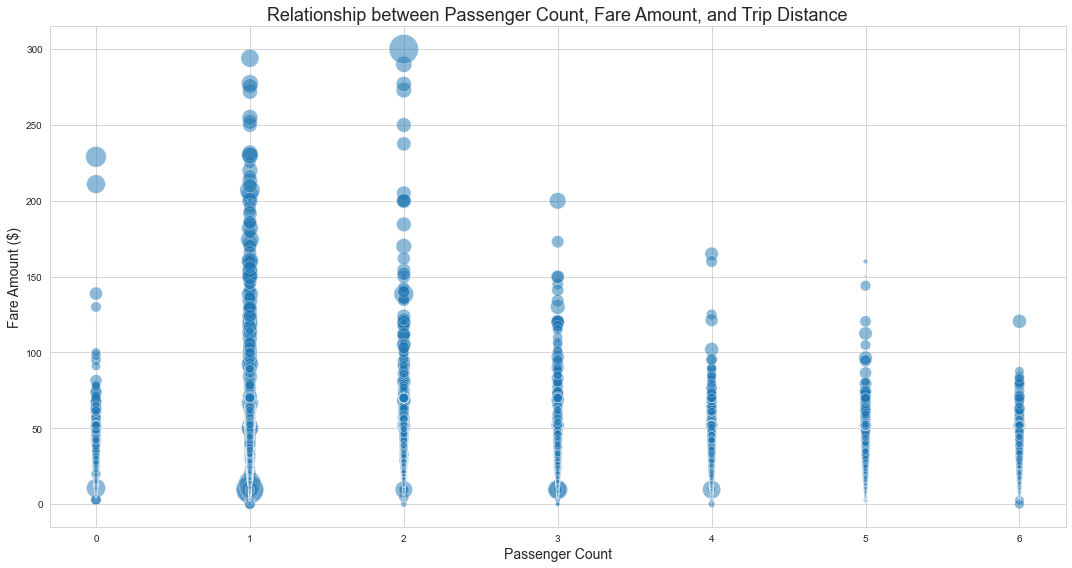

In [783]:
# Setting up the plotting environment
plt.figure(figsize=(15, 8))

# Creating the multi-variable scatter plot for Passenger_Count vs Fare_Amount
# with dot size representing Trip_Distance
plt.scatter(data=taxi_df_cleaned, x='Passenger_Count', y='Fare_Amount', s=taxi_df_cleaned['Trip_Distance']*5, alpha=0.5, edgecolors="w", linewidth=0.5)

plt.title('Relationship between Passenger Count, Fare Amount, and Trip Distance', fontsize=18)
plt.xlabel('Passenger Count', fontsize=14)
plt.ylabel('Fare Amount ($)', fontsize=14)
plt.tight_layout()
plt.show()


### Insights from the Scatter Plot on `Passenger Count`, `Fare Amount`, and `Trip Distance` 🌟 💡

1. **Dominance of Solo and Duo Rides**: A vast majority of rides accommodate 1 or 2 passengers. This indicates that solo and duo trips are the most common in this dataset.

2. **Range of Fare Amounts**: As the number of passengers increases beyond 2, the range of fare amounts becomes more confined. Most higher passenger count rides (e.g., 5 or 6 passengers) tend to have fare amounts in a specific range, suggesting these could be pre-fixed rates or commonly traveled distances for larger groups.

3. **Trip Distance Influence**: The size of each point (representing the trip distance) generally correlates with fare amounts. Larger dots, representing longer distances, are often associated with higher fares. This is expected, as longer rides should cost more. However, there are also larger dots (longer trips) spread across various fare amounts, suggesting other factors, like rate codes or routes, might influence the fare.

4. **Short Rides with Multiple Passengers**: There are instances where rides with multiple passengers (3-6) have shorter distances (small dots) but varying fare amounts. This could indicate short group trips within the city or to nearby destinations.

5. **Scarcity of High Passenger Count Long Rides**: Rides with the maximum passenger count (e.g., 5 or 6 passengers) and longer distances (larger dots) are relatively rare. This could be because larger groups might not frequently opt for long-distance taxi trips, or such configurations might be less available.

#### 5.4.2 Relationship between `Fare Amount`, `Tip Amount` and `RateCodeID`

In this multi-variable scatter plot: plotting Fare_Amount vs Tip_Amount, with dot color representing Rate_Code_ID to see if certain rate codes influence tipping behavior.

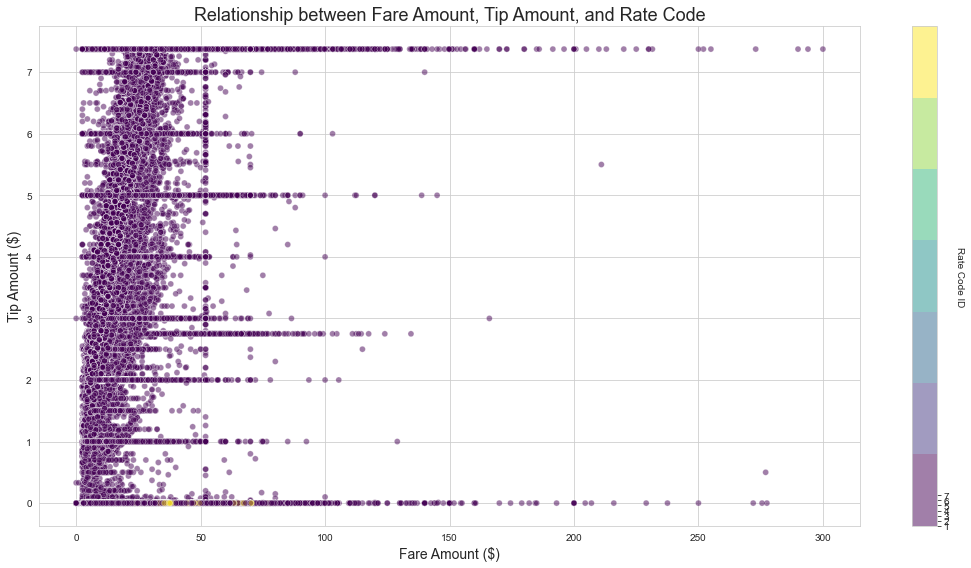

In [784]:
# Setting up the plotting environment
plt.figure(figsize=(15, 8))

# Defining a colormap to represent different Rate_Code_IDs
cmap = plt.get_cmap('viridis', taxi_df_cleaned['Rate_Code_ID'].nunique())

# Creating the multi-variable scatter plot for Fare_Amount vs Tip_Amount
# with dot color representing Rate_Code_ID
scatter = plt.scatter(data=taxi_df_cleaned, x='Fare_Amount', y='Tip_Amount', c='Rate_Code_ID', cmap=cmap, alpha=0.5, edgecolors="w", linewidth=0.5)

# Adding colorbar and labels
cbar = plt.colorbar(scatter, ticks=range(1, taxi_df_cleaned['Rate_Code_ID'].nunique() + 1))
cbar.set_label('Rate Code ID', rotation=270, labelpad=15)

plt.title('Relationship between Fare Amount, Tip Amount, and Rate Code', fontsize=18)
plt.xlabel('Fare Amount ($)', fontsize=14)
plt.ylabel('Tip Amount ($)', fontsize=14)
plt.tight_layout()
plt.show()


### Insight from  Relationship between `Fare Amount`, `Tip Amount` and `RateCodeID` 🌈💡

1. **Concentration of Trips**: A significant majority of the trips are associated with a particular rate code, as indicated by the dominant color in the scatter plot. This suggests that most trips are charged at a standard rate, likely representing regular city commutes.

2. **Correlation**: There's a clear positive correlation between fare amount and tip amount. As the fare for the trip increases, passengers generally tend to give higher tips. This is a typical behavior since many passengers calculate tips as a percentage of the fare.

3. **Specific Rate Codes & Higher Fares and Tips**: Trips with distinctly higher fare amounts and tip amounts are associated with certain rate codes, as indicated by the clusters of different colors. These could represent special types of trips, such as airport rides, long-distance travels, or rides under special fare agreements, which result in higher fares and subsequently higher tips.

4. **Variability in Tip Amounts for Similar Fares**: For a given fare amount, the tip amount can vary significantly. This variability is evident across different rate codes, suggesting that factors other than the fare amount and rate code, such as passenger satisfaction or customary tipping habits, influence the tip amount.

5. **Presence of Low/No Tips for Higher Fares**: There are instances where higher fare amounts have received very low or no tips. This could be due to various reasons, including unsatisfactory service, cash payments without enough change, or passengers' personal tipping habits.

6. **Diversity in Rate Codes for Similar Fare Ranges**: Within a similar fare range, there are trips associated with different rate codes. This indicates that the nature or purpose of the trip (e.g., regular commute, airport transfer, long-distance travel) can significantly vary even if the fare amount is comparable.


Drawing from these insights and a broader analysis of the dataset, the following **management summary** articulates the key takeaways, business implications, and forward-looking recommendations for the NYC taxi industry.

# Management Summary 📋

## Introduction 📖:
This document provides a snapshot of insights derived from an in-depth analysis of the NYC taxi dataset, offering a comprehensive look at taxi ride patterns, behaviors, and business implications.

## Key Findings 🔍:

- **Total Rides 🚖**: The dataset captured approximately **305,000** taxi rides.

### Trip Details 🛤️:
- The average distance covered in a taxi ride was **3.18** miles.
- Typically, there were **1** passengers per taxi trip.
- The average fare for these rides was **\$13.51**.

### Payment Preferences 💳:
- The most commonly used payment method is labeled as "1". While the exact method this represents **(credit card)**, it's clear that this is the favored mode.

### Taxi Activity Patterns 🕰️:
- The peak hour for taxi services is **6 PM**, suggesting a surge during evening commutes.
- Conversely, **4 AM** is the least active hour, indicating a lull in taxi demand.

## Implications for Business 📊:
- **Evening Rush 🌇**: The 6 PM spike underscores the importance of ensuring maximum taxi availability during this period to cater to the high demand.
- **Short Journeys 🏙️**: The average fare and distance hint at predominantly short, city commutes, potentially within urban zones.
- **Payment Insights 💡**: The popularity of payment type "1" **(Credit Card)** suggests a trend or preference that can be further explored for business opportunities, such as **collaborating** with banking companies to provide additional offers to customers to use the taxi services more and more.

## Recommendations 📝:
- **Strategic Pricing 💲**: Offer incentives or discounts during off-peak hours, especially early mornings, to balance out demand and attract riders.
- **Payment Promotions 🎉**: Investigate the specifics of payment type "1" **(Credit Card)** and consider promotions or benefits for users opting for this method.
- **Location Analysis 📍**: Dive deeper into popular pickup and drop-off zones to optimize taxi deployment in high-demand areas.

## For Future Considerations 🔄:
- **Loyalty Programs 🎁**: Reward frequent riders with special offers or points to ensure customer retention.
- **Local Partnerships 🤝**: Collaborate with city events or businesses for combo deals or special ride rates.
- **Feedback Loop 💬**: A system to gather direct customer feedback can lead to continuous service improvement.
- **Safety 🛑**: Implement measures like ride tracking for family or friends and regular vehicle maintenance checks.
- **Eco-Friendly Approach 🌱**: Consider introducing electric or hybrid taxis to appeal to environmentally-conscious riders.


## Conclusion 🌟
Our exploration of the NYC taxi dataset has revealed key patterns and behaviors in taxi rides. These insights set the stage for informed decisions in taxi operations and service improvement.

## Future Work 🛠️:

- **Predictive Modeling 📈**: Use the data to forecast taxi demand, ensuring optimal availability during peak times.
- **Rider Segmentation 🧑‍🤝‍🧑**: Apply algorithms to segment riders, enabling tailored services or promotions.
- **Efficiency Analysis 🔍**: Dive into routes and times to find optimal paths and reduce operational costs.
- **Dynamic Pricing 💲**: Leverage insights to formulate pricing strategies that balance revenue and affordability.

The potential of this dataset extends beyond analysis, offering a roadmap for actionable strategies to elevate the taxi experience in NYC.
